# Part I - Exploration of 2019 Wage Income in Minnesota
## by Brian Allan Woodcock
### July 2022

## Outline<a name="top"></a>

[Introduction](#introduction)

[Preliminary Wrangling](#prelim)

[Univariate Exploration](#univariate)

[Bivariate Exploration](#bivariate)

[Multivariate Exploration](#multivariate)

[Conclusions](#conclusions)

## Introduction<a name="introduction"></a>

The aim of this exploratory investigation is to look at earned income in Minnesota, primarily wage income, in 2019 across different factors such as age, sex, marital status, race/ethnicity, and educational attainment.  

The data was obtained from IPUMS ("Integrated Public Use Microdata Series") USA (https://usa.ipums.org/usa/index.shtml), a source for US Census microdata that provides easy access to the microdata along with documentation and harmonization of variables across time periods.  (Microdata consists of individual records rather than "summary" or "aggregate" data.)  The original source of the data is the US Census Bureau -- in particular, their **American Community Survey (ACS)**, a yearly sample of the American population that began in 2000 for the purpose of obtaining more detailed information than what is available via the decennial census.

The IPUMS samples are **cluster samples**.  Sampling occurs foremost on the basis of **households** or **dwellings** and only derivatively are individuals sampled as parts of households.  The samples are also **stratified** -- i.e., they divide the population into strata (based on characteristics such as geography, household size, race, and group quarters membership) and then sample separately from each stratum.  To protect individual confidentiality, geographic identifiers are restricted to the state level and certain individual variables, such as income variables, are **top-coded**.  That is, for responses with a numeric value beyond a certain threshold, the actual reported value is not present in the dataset; rather, the state mean of all values above the threshold is used as a replacement. So, all top-coded variables are top-coded using the state mean of all cases greater than or equal to the state threshold value for that variable.  In visualizations, the top-coded values usually stand out (as in some way anomalous) at the extreme high end of the spectrum of values.

The ACS oversamples areas with smaller populations. Each month a systematic sample is drawn to represent each U.S. county or county equivalent. The selected monthly sample is mailed the ACS survey at the beginning of the month. Nonrespondents are contacted via telephone for a computer assisted telephone interview (CATI) one month later. One third of the nonrespondents to the mail or telephone survey are contacted in person for a computer assisted personal interview (CAPI) one month following the CATI attempt. Weights for the household and person-level data adjust for the mixed geographic sampling rates, nonresponse adjustments, and individual sampling probabilities. (From: https://usa.ipums.org/usa/chapter2/chapter2.shtml)

It must be emphasized that the ACS yearly data samples are **weighted** samples since not every individual sample case represents the same number of people in the overall population because of the sample design which includes oversampling of areas with smaller populations.  Each sample case represents anywhere from 20 to 1000 people in the complete population for the given year. The "weight" variables indicate how many persons in the population are represented by each sample case.  So, the use of the weights is necessary in order for the sample to be (at least approximately) representative of the distribution of features within the overall U.S. population.  That is, the use of the weights is necessary in order to produce statistical estimates -- i.e., proportions, means, medians, and ratios.  Weights not only require special attention when analyzing the data, but they also create special challenges for producing some visualizations when the visualization function does not have an in-built parameter for adding weights.

The IPUMS USA website allows for the selection of samples (based on years) along with the selection of variables to create a data set for downloading.  The variables are well documented and the data is fairly clean.  Learning how to use the IPUMS resources takes some investment of time and effort, however, but there are helpful videos for getting started as well as useful documentation on the website.  Two selection choices were made for obtaining data from the 2019 ACS sample.  Minnesota was chosen, first, to narrow the scope of the investigation and thereby decrease the size of the dataset and, second, because this is the author's state of residence.  Also, only persons 20 years and older were selected, since the aim is to investigate income of adults in the workforce.


#### References

Steven Ruggles, Sarah Flood, Sophia Foster, Ronald Goeken, Megan Schouweiler and Matthew Sobek. IPUMS USA: Version 12.0 [accessed 5/11/2022]. Minneapolis, MN: IPUMS, 2022. https://doi.org/10.18128/D010.V12.0

U.S. Census Bureau. American Community Survey Operations Plan. Release 1: March 2003. https://usa.ipums.org/usa/resources/codebooks/ACS_codebook.pdf

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

## Preliminary Wrangling<a name="prelim"></a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read in dataset
df19 = pd.read_csv('usa_00006.csv')
df19.columns = df19.columns.str.lower()  # Change column names to lower case
df19.head()

,year,sample,serial,cbserial,hhwt,cluster,cpi99,statefip,strata,gq,...,incwage,incbus00,incss,incwelfr,incinvst,incretir,incsupp,incother,incearn,erscor90
0,2019,201901,689720,2019010000012,11.0,2019006897201,0.652,27,110127,4,...,12000,0,0,0,0,0,0,0,12000,18.5
1,2019,201901,689721,2019010000014,23.0,2019006897211,0.652,27,110227,4,...,0,0,12000,0,0,0,0,0,0,999.9
2,2019,201901,689722,2019010000037,119.0,2019006897221,0.652,27,130227,3,...,0,0,8900,0,10,0,0,0,0,999.9
3,2019,201901,689723,2019010000095,85.0,2019006897231,0.652,27,100027,3,...,0,0,10300,0,0,0,0,0,0,999.9
4,2019,201901,689724,2019010000362,14.0,2019006897241,0.652,27,170027,4,...,0,0,9600,0,0,0,0,0,0,999.9


In [3]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43143 entries, 0 to 43142
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       43143 non-null  int64  
 1   sample     43143 non-null  int64  
 2   serial     43143 non-null  int64  
 3   cbserial   43143 non-null  int64  
 4   hhwt       43143 non-null  float64
 5   cluster    43143 non-null  int64  
 6   cpi99      43143 non-null  float64
 7   statefip   43143 non-null  int64  
 8   strata     43143 non-null  int64  
 9   gq         43143 non-null  int64  
 10  pernum     43143 non-null  int64  
 11  perwt      43143 non-null  float64
 12  sex        43143 non-null  int64  
 13  age        43143 non-null  int64  
 14  marst      43143 non-null  int64  
 15  race       43143 non-null  int64  
 16  raced      43143 non-null  int64  
 17  hispan     43143 non-null  int64  
 18  hispand    43143 non-null  int64  
 19  rachsing   43143 non-null  int64  
 20  educ  

We observe that none of the variables have null values.  Variable values --- whether the variable is numerical or categorical --- are encoded numerically, either as integers or as floats.

In [4]:
# How many unique values are there per variable?
for var in df19.columns:
    print(f"{var:<10}:" + f"  {df19[var].nunique()}")

year      :  1
sample    :  1
serial    :  24481
cbserial  :  24481
hhwt      :  692
cluster   :  24481
cpi99     :  1
statefip  :  1
strata    :  43
gq        :  5
pernum    :  14
perwt     :  817
sex       :  2
age       :  73
marst     :  6
race      :  9
raced     :  82
hispan    :  5
hispand   :  23
rachsing  :  5
educ      :  11
educd     :  24
empstat   :  3
empstatd  :  5
labforce  :  2
classwkr  :  3
classwkrd :  9
occ1990   :  312
occ2010   :  421
inctot    :  3570
ftotinc   :  4398
incwage   :  770
incbus00  :  445
incss     :  339
incwelfr  :  124
incinvst  :  464
incretir  :  570
incsupp   :  176
incother  :  378
incearn   :  1069
erscor90  :  108


### What is the structure of your dataset?

The 2019 data has 43,143 rows.  Weights, given by the variable `perwt` (for person weight as compared with household weight), can be used to obtain estimates that are representative of the population as a whole.  There are 41 variables.


### What is/are the main feature(s) of interest in your dataset?

The main feature of interest is earned income (`incearn`), especially wage income (`incwage`).  These are both continuous, numerical variables as opposed to categorical values using numerical value encoding.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The aim of the investigation is foremost to explore wage income and differences in wage income across a variety of factors such as age (`age`), sex (`sex`), marital status (`marst`), race/ethnicity (`rachsing`), and educational attainment (`educ`).  In some cases, such as race/ethnicity, there is a constellation of variables related to the general topic (some providing more detail than others or touching on a unique question).   It would be unmanageable to investigate all of the variables in the constellation so a decision is needed in these cases as to just which ones to focus on.  In some cases, too, feature engineering may be needed to obtain just the level of detail desired.

Besides the feature of interest and the factors by which to investigate that feature, there are some variables that need to be investigated because they play an enabling role for the investigation.  Since the samples are weighted, the person weight variable (`perwt`) should be looked at so that it is well-understood.  Also, employment status (`empstat`) and labor force involvement (`labforce`) should also be well-understood since it may be necessary to exclude certain people in the sample from the investigation because they are unemployed or consider themselves no longer a part of the labor force -- i.e., they don't fit the traditional profile of a wage worker.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

## Univariate Exploration<a name="univariate"></a>

In this section, we will become familiar with -- and sometimes invent (by means of feature engineering) -- the variables for the investigation.  How these variables then relate to one another will be explored further in the sections on bivariate and multivariate exploration.

- [Person Weight](#uni_weight)
- [Age Distribution](#uni_agedistro)
- [Age Categories](#uni_agecat)
- [Sex](#uni_sex)
- [Marital Status](#uni_marst)
- [Race/Ethnicity](#uni_race)
- [Educational Attainment](#uni_educat)
- [Employment](#uni_employ)
- [Earned Income](#uni_income)

### Person Weight -- `perwt`<a name="uni_weight"></a>

Person weight (`perwt`) indicates how many persons in the U.S. population are represented by a given person in an IPUMS sample.  The weights are necessary in order to obtain nationally representative statistics. 

**Question**: What does the distribution of person weights look like?

In [5]:
df19.perwt.describe()

count    43143.000000
mean        97.375681
std        111.292538
min          1.000000
25%         26.000000
50%         59.000000
75%        131.000000
max       2408.000000
Name: perwt, dtype: float64

In [6]:
df19.perwt.value_counts().sort_index().head(25)

1.0       2
2.0      38
3.0      49
4.0      28
5.0      52
6.0      60
7.0      99
8.0     113
9.0     170
10.0    196
11.0    275
12.0    353
13.0    377
14.0    488
15.0    651
16.0    587
17.0    795
18.0    802
19.0    687
20.0    829
21.0    810
22.0    672
23.0    768
24.0    632
25.0    617
Name: perwt, dtype: int64

In [7]:
df19.perwt.value_counts().sort_index().tail(10)

1325.0    1
1382.0    1
1393.0    1
1414.0    1
1422.0    1
1519.0    1
1531.0    1
1852.0    1
1931.0    1
2408.0    1
Name: perwt, dtype: int64

In [8]:
modewt = df19.perwt.value_counts().max()
modewt

829

In [9]:
maxwt = df19.perwt.value_counts().sort_index().index[-1]

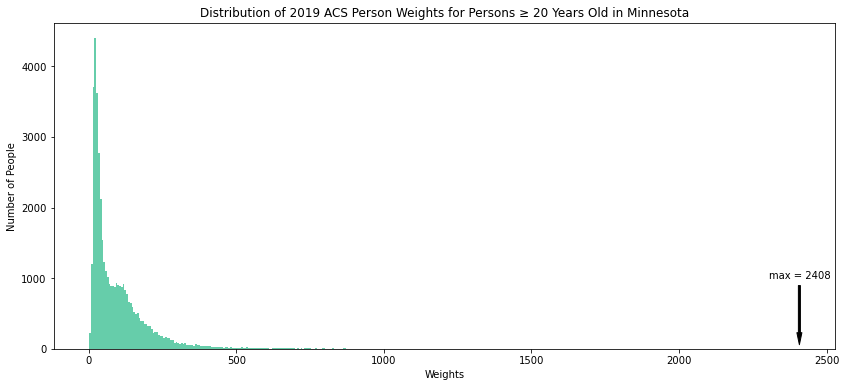

In [10]:
plt.figure(figsize=(14,6))

plt.hist(data=df19, x='perwt', bins='auto', color='mediumaquamarine')

plt.title(f'Distribution of 2019 ACS Person Weights for Persons {8805:c} 20 Years Old in Minnesota')

plt.xlabel('Weights')

plt.ylabel('Number of People')

ax = plt.gca()
ax.annotate(f"max = {maxwt:.0f}", 
            xy=(maxwt, 10), 
            xytext=(maxwt, 1000),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=5),
            horizontalalignment='center');

#### Observations

The distribution of person weights is clearly right-skewed.  Most of the distribution is contained in the lower values.  In order to observe the lower end better, we will display the log transform of the person weights along the x-axis.

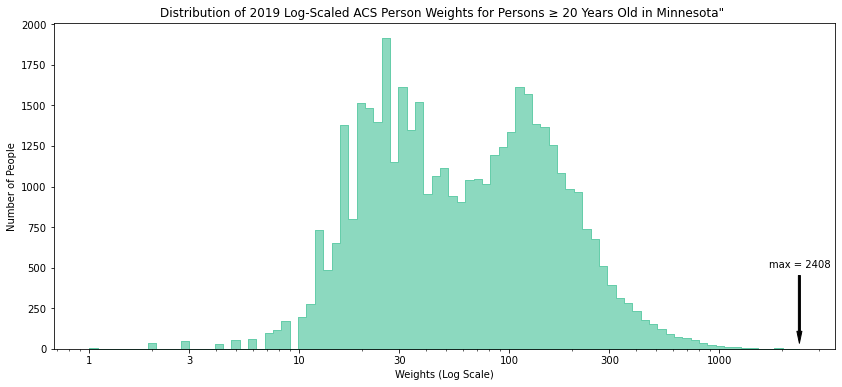

In [11]:
xticks = [1, 3, 10, 30, 100, 300, 1000]
xlabels = [f"{v:n}" for v in xticks]
#print(xlabels)

plt.figure(figsize=(14,6))

sb.histplot(data=df19, x='perwt', bins='auto', log_scale=[True, False], element='step', color='mediumaquamarine')

plt.title(f'Distribution of 2019 Log-Scaled ACS Person Weights for Persons {8805:c} 20 Years Old in Minnesota" ')

plt.xlabel('Weights (Log Scale)')

plt.ylabel('Number of People')

plt.xticks(ticks=xticks, labels=xlabels)

ax = plt.gca()
ax.annotate(f"max = {maxwt:.0f}", 
            xy=(maxwt, 10), 
            xytext=(maxwt, 500),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=5),
            horizontalalignment='center');

#### Observations
- The log transform of the person weights distribution allows us to examine the lower end much better.  In the log scale, the distribution almost appears like a symmetric bi-modal distribution with peaks at around 28 and 110.
- Note that differences between the untransformed and the log-transformed heights of the bins is due to the fact that the bin sizes are different between the two plots.  The log-transformed bins appear to be of equal size in the log scale, in particular.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Age Distribution in 2019<a name="uni_agedistro"></a>

Aim: Examine the age distribution of Minnesotans (20 years old or more) in 2019 using the `age` variable.  In order for the 2019 ACS sample to be representative, the person weightings will be used.  The use of the person weightings yields estimates that are the size of population totals (as though obtained through a census) even though they come from a sample.  This should be kept in mind.

**Question**: What does the age distribution of Minnesotans (20 years old or more) in 2019 look like?

In [12]:
# Create Pandas series indexed by ages of the number of people per age using the weightings
ages_2019dist = df19[['age', 'perwt']].groupby(by='age').perwt.sum()
ages_2019dist

age
20    71400.0
21    72921.0
22    64342.0
23    72242.0
24    74287.0
       ...   
88    11601.0
89    11724.0
90     6918.0
91     7473.0
95    31285.0
Name: perwt, Length: 73, dtype: float64

In [13]:
# Check that the total sum with the new series object matches population expectations
totpop_2019 = ages_2019dist.sum()

f"The total population of adults 20 years and older according to the 2019 sample is: {totpop_2019:,.0f}"

'The total population of adults 20 years and older according to the 2019 sample is: 4,201,079'

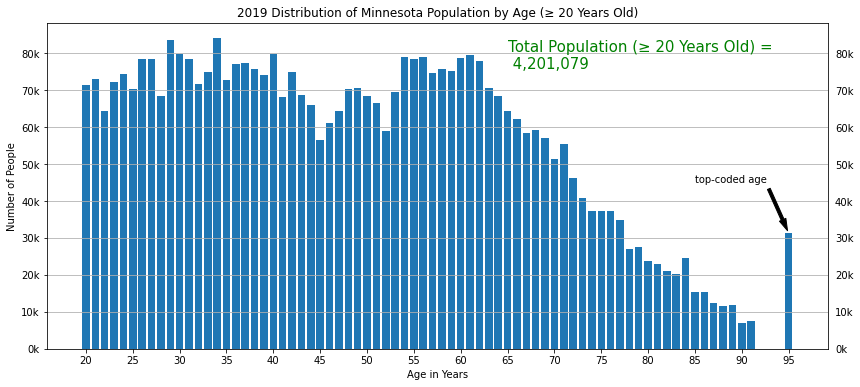

In [14]:
# Create bar chart with population at each age using the person weighted sums

x = ages_2019dist.index
y = ages_2019dist.values

x_ticks = np.arange(20, 100, 5)

y_ticks = [y * 1e4 for y in range(9)]
y_labels = [f"{num/1e3:.0f}k" for num in y_ticks]

plt.figure(figsize=(14,6))

plt.bar(x=x, height=y)

plt.xticks(ticks=x_ticks)
plt.yticks(ticks=y_ticks, labels=y_labels)

ax = plt.gca()
ax.tick_params(labelright=True)   # add y-ticks on the right hand side

plt.grid(visible=True, axis='y')  # put in horizontal grid lines

ax.text(x=65, y=75000, 
        s=f"Total Population ({8805:c} 20 Years Old) = \n {totpop_2019:,.0f}",
        verticalalignment='bottom', horizontalalignment='left',
        color='green', fontsize=15)

ax.annotate('top-coded age', xy=(95, ages_2019dist.iloc[-1]), xytext=(85, 4.5e4),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=7),
            horizontalalignment='left')

plt.title(f"2019 Distribution of Minnesota Population by Age ({8805:c} 20 Years Old)")
plt.xlabel('Age in Years')
plt.ylabel(f"Number of People");

#### Observations

- The upper top-coding threshold for `age` in Minnesota for the 2019 ACS is 92.  All individuals that age and beyond are assigned the mean age for that group, namely, the age 95. These observations match with the information available in the 2019 ACS spreadsheet of top-coded thresholds and values (available from IPUMS USA).  Top-coding helps to protect individual anonymity.
- The nearly constant decline in the population starting at about age 63 is visually striking.  It appears to be nearly linear, although some kind of curve with a gentle curvature (like a slowly decaying exponential) may fit as well or better if we had access to the ages at the upper extreme end.  In an investigation on age demographics (not this exploration), one might investigate the negative slope of this decrease and use curve-fitting techniques to come up with a mathematical model.
- The "divot" in the center of the distribution corresponding to ages of roughly 44 to 53 is also visually striking because the population in this region appears to be depressed by about 10,000 as compared with the surrounding age regions.  Those ages correspond with birth years of 1966 to 1975, the height of the U.S. involvement in Vietnam.  Further investigation would be necessary to elevate any speculation about a causal connection beyond that of a mere correlation, but this would be an interesting hypothesis to explore in an investigation on age demographics.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Age Categories -- `agecat`<a name="uni_agecat"></a>
Aim: Create age categories for less fine-grained age visualization.

In [15]:
# Create bins for age
step=10
bin_edges = np.arange(20,100+step, step)
bin_edges

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])

In [16]:
bin_starts = bin_edges[0:-1]
bin_starts

array([20, 30, 40, 50, 60, 70, 80, 90])

In [17]:
# Create a new variable `agecat` with age categories using pandas cut method

df19['agecat'] = pd.cut(x=df19.age, bins=bin_edges,
       labels=[f"{value}s" for value in bin_starts],
       ordered=True, right=False, include_lowest=True)

In [18]:
# Check on the newly created age categories associated with `agecat`
df19.agecat.unique()

['20s', '70s', '90s', '30s', '60s', '50s', '80s', '40s']
Categories (8, object): ['20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s' < '90s']

In [19]:
# Create Pandas series indexed by age category of the number of people per category using the weightings

agecat_2019dist = df19[['agecat', 'perwt']].groupby(by='agecat').perwt.sum()
agecat_2019dist

agecat
20s    733893.0
30s    765931.0
40s    680552.0
50s    725165.0
60s    676149.0
70s    394862.0
80s    178851.0
90s     45676.0
Name: perwt, dtype: float64

In [20]:
# Check that the series total matches population expectations

tot2019 = agecat_2019dist.sum()

f"The total population of adults 20 years and older according to the 2019 sample is: {tot2019:,.0f}"

'The total population of adults 20 years and older according to the 2019 sample is: 4,201,079'

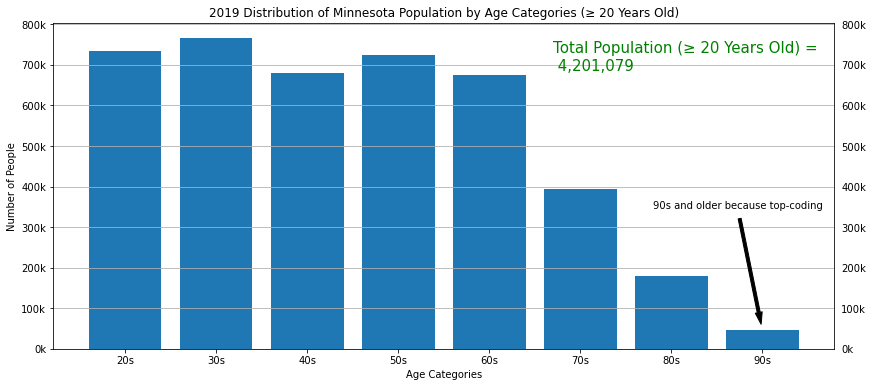

In [21]:
# Create bar chart with population in each age category

x = agecat_2019dist.index
y = agecat_2019dist.values

y_ticks = [y * 1e5 for y in range(9)]
y_labels = [f"{num/1e3:.0f}k" for num in y_ticks]

plt.figure(figsize=(14,6))

plt.bar(x=x, height=y)

plt.yticks(ticks=y_ticks, labels=y_labels) 

ax = plt.gca()
ax.tick_params(labelright=True)   # add y-ticks on the right hand side

plt.grid(visible=True, axis='y')   # put in horizontal grid lines

ax.text(x=4.7, y=680000, 
        s=f"Total Population ({8805:c} 20 Years Old) = \n {tot2019:,.0f}",
        verticalalignment='bottom', horizontalalignment='left',
        color='green', fontsize=15)

ax.annotate('90s and older because top-coding', 
            xy=(7, agecat_2019dist.iloc[-1]), 
            xytext=(5.8, agecat_2019dist.iloc[-1] + 3e5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=7),
            horizontalalignment='left')

plt.title(f"2019 Distribution of Minnesota Population by Age Categories ({8805:c} 20 Years Old)")
plt.xlabel('Age Categories')
plt.ylabel(f"Number of People");

#### Observations

- As on the previous bar chart, we see the divot in the middle of the distribution occuring around the 40s, although it is less striking than on the previous bar chart because the actual divot straddles the 40s and the 50s.
- Because all individuals with age 92 and greater are assigned the top-coded age of 95, people even in their 100s are lumped in with the 90s group, so this grouping should be interpreted as "90s and above".

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Sex<a name="uni_sex"></a>

Aim: Examine Minnesota population of persons 20 years old or more by sex using the `sex` variable.

| Encoding | Interpretation |
|:--|:--|
| 1 | Male |
| 2 | Female |

**Question**:  What is the 2019 sex distribution of persons 20 years old or more?

In [22]:
sex_dict = {1: 'Male', 2: 'Female'}

In [23]:
# Create pandas series with person weight sums by sex

sex_2019dist = df19[['sex', 'perwt']].groupby(by='sex').perwt.sum()
sex_2019dist

sex
1    2074299.0
2    2126780.0
Name: perwt, dtype: float64

In [24]:
f"The sex ratio (i.e., the ratio of males to females) is: {sex_2019dist[1]/sex_2019dist[2]:.2f}"

'The sex ratio (i.e., the ratio of males to females) is: 0.98'

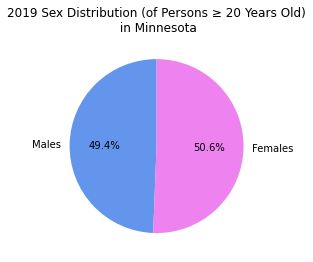

In [25]:
# Create pie chart showing population proportion by sex

plt.pie(x=sex_2019dist, labels=['Males', 'Females'], 
        colors=['cornflowerblue', 'violet'], 
        startangle=90, autopct='%1.1f%%')

plt.title(f"2019 Sex Distribution (of Persons {8805:c} 20 Years Old)\n in Minnesota");

#### Observations

- The sex ratio is slightly less than 1, namely, 97.5%.  This, of course, is not for the total Minnesota population but for adults 20 years old or more in 2019.

The interest in this variable concerns the question: Are there differences in income based on sex?

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Marital Status<a name="uni_marst"></a>

**Question**: What does the marital status distribution of the 2019 population (20 years old or more) look like?

Aim: Examine the population distribution by marital status using the `marst` variable.

|Encoding | Interpretation |
|:--|:--|
|1  |                 Married, spouse present |
|2   |                Married, spouse absent  |
|3   |                Separated  |
|4   |                Divorced  |
|5   |                Widowed  |
|6   |                Never married/single  |


In [26]:
# Create pandas series grouped by marital status and with sums using person weightings

marst_2019dist = df19[['marst', 'perwt']].groupby(by='marst').perwt.sum()
marst_2019dist

marst
1    2252007.0
2      72496.0
3      39673.0
4     494994.0
5     224733.0
6    1117176.0
Name: perwt, dtype: float64

In [27]:
# Check that the series sum matches with population expectations

marst_2019dist.sum()

4201079.0

In [28]:
# Create a marriage status dictionary to match the encodings with their interpretation

marst_dict = {
1 : 'Married,\n spouse present',
2 : 'Married,\n spouse absent',
3 : 'Separated',
4 : 'Divorced',
5 : 'Widowed',
6 : 'Never\n married/Single'}
marst_dict

{1: 'Married,\n spouse present',
 2: 'Married,\n spouse absent',
 3: 'Separated',
 4: 'Divorced',
 5: 'Widowed',
 6: 'Never\n married/Single'}

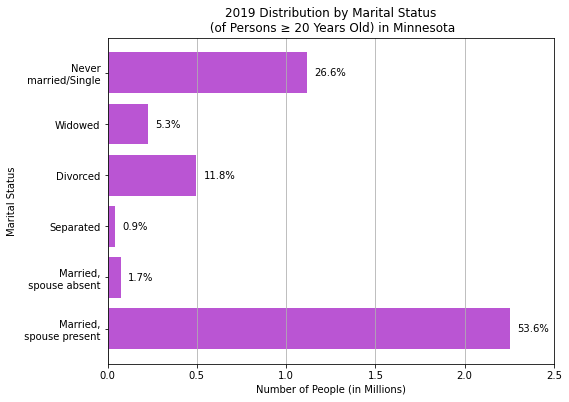

In [29]:
# Create horizontal bar chart of distribution of people by marriage status

y = marst_2019dist.index
x = marst_2019dist.values

tot = marst_2019dist.sum()

marst_list = list(marst_dict.values())  # for tick labels

plt.figure(figsize=(8,6))

plt.barh(y=y, width=x, tick_label=marst_list, color='mediumorchid')

plt.grid(visible=True, axis='x')

plt.title(f"2019 Distribution by Marital Status\n (of Persons {8805:c} 20 Years Old) in Minnesota");

locs, labels = plt.xticks()
x_labels = [f"{num/1e6:.1f}" for num in locs]
plt.xticks(ticks=locs, labels=x_labels)

plt.ylabel('Marital Status')
plt.xlabel(f"Number of People (in Millions)")

# Adding text to the bars
for i in y:
    x_loc = marst_2019dist[i]
    x_prop = x_loc/tot
    pct_string = f"{x_prop:0.1%}"   # Create the string value
    plt.text(x=x_loc + .01 * tot, y=i, s=pct_string, va='center');   # Print the string value next to the bar

#### Observations

The details of the bar chart are obvious.  Over half were married with the spouse present.  Slightly more than a quarter were "Never married/Single".  Almost 12% were currently divorced.  The interest in marital status is whether it correlates in any interesting way with income. 

- Is there a difference between being married and single?  
- Does stress on the marriage ("spouse absent" or "separated") make a difference?  
- Does a terminated marriage ("widowed" or "divorced") seem to make a difference?


Any observed differences could then suggest hypotheses that might be further investigated.


***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Race/Ethnicity<a name="uni_race"></a>

**Question**:  What does the 2019 distribution of the population (20 years old or more) by race/ethnicity look like?

Aim: Examine the distribution of the population by race using the variable `rachsing`.

| Encoding | Interpretation |
|:--|:--|
| 1 | White |
| 2 | Black/African American |
| 3 | American Indian/Alaska Native |
| 4 | Asian/Pacific Islander |
| 5 | Hispanic/Latino |

The variable `rachsing` chosen here to represent race is a variable constructed from other variables by IPUMS USA.  In the ACS, there are separate questions for race and ethnicity (i.e., Hispanic origin or not).  This variable assigns people to a single race/ethnicity category.  It provides a simplified race/ethnicity designation, using information from the survey variables `race` and `hispan` (Hispanic origin) as well as others.  

All people who reported Hispanic origins are classified as Hispanic regardless of their race response.  Non-Hispanic single-race respondents (American Indian/Alaska Native, Asian and/or Pacific Islander, Black/African American, and White) are classified according to their race response. Non-Hispanic people who reported “some other race” in combination with one of these race groups were classified as if they had not reported “some other race.”  Non-Hispanic multiple-race people and non-Hispanic people who reported only “some other race” are assigned to a single category by means of an equation using the individual’s age, sex, region, and the urbanization level and racial diversity of their geographic region to predict which single race the person would have chosen if asked to choose only one.  (For more information see: https://usa.ipums.org/usa-action/variables/RACHSING#description_section )

In [30]:
# Create pandas series grouped by racial categories using the person weights

rachsing_2019dist = df19[['rachsing', 'perwt']].groupby(by='rachsing').perwt.sum()
rachsing_2019dist

rachsing
1    3525519.0
2     249554.0
3      35280.0
4     207922.0
5     182804.0
Name: perwt, dtype: float64

In [31]:
# Create a racial category dictionary to match encodings with their interpretation

rachsing_dict = {
1 : 'White',
2 : 'Black/African\n American',
3 : 'American Indian/\nAlaska Native',
4 : 'Asian/Pacific\n Islander',
5 : 'Hispanic/Latino'}
rachsing_dict

{1: 'White',
 2: 'Black/African\n American',
 3: 'American Indian/\nAlaska Native',
 4: 'Asian/Pacific\n Islander',
 5: 'Hispanic/Latino'}

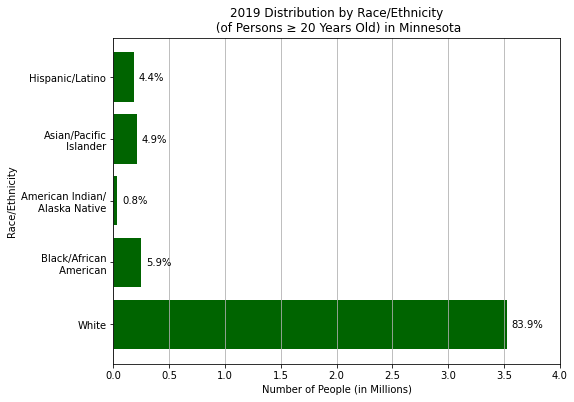

In [32]:
# Create horizontal bar chart of distribution of people by single racial/ethnicity categories

y = rachsing_2019dist.index
x = rachsing_2019dist.values

tot = rachsing_2019dist.sum()

rachsing_list = list(rachsing_dict.values())   # for tick labels

plt.figure(figsize=(8,6))

plt.barh(y=y, width=x, tick_label=rachsing_list, color='darkgreen')

plt.grid(visible=True, axis='x')

plt.title(f"2019 Distribution by Race/Ethnicity\n (of Persons {8805:c} 20 Years Old) in Minnesota");

locs, labels = plt.xticks()
x_labels = [f"{num/1e6:.1f}" for num in locs]
plt.xticks(ticks=locs, labels=x_labels)

plt.ylabel('Race/Ethnicity')
plt.xlabel(f"Number of People (in Millions)")

# Adding text to the bars
for i in y:
    x_loc = rachsing_2019dist[i]
    x_prop = x_loc/tot
    pct_string = f"{x_prop:0.1%}"   # Create the string value
    plt.text(x=x_loc + .01 * tot, y=i, s=pct_string, va='center');   # Print the string value next to the bar

#### Observations

- Unsurprisingly, Minnesota's population is largely "white" with minority populations of Hispanic/Latino, Asian/Pacific Islander, and Black/African American that are roughly of the same magnitude.
- Minnesota has a sizeable Somali population.  This raises the question: What proportion of the Black/African American population in Minnesota is comprised of Somalis.  The same could be asked of the Hmong community in Minnesota vis-a-vis the Asian designation.
- The small size of the American Indian population (relative to the other minorities) does stand out given the quantity and geographic size of reservations in Minnesota and how integral the native peoples are in the history of Minnesota.  Why is the number so small?  Has there been a lot of intermarriage with the white population so that many descendants of the native peoples of Minnesota have assimilated into the dominant white population?

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Educational Attainment<a name="uni_educat"></a>

**Question**: What does the distribution of the 2019 population by educational attainment look like?

Aim: Examine the distribution of the population by educational attainment.

The variable `educ` indicates respondents' educational attainment, as measured by the highest year of school or degree completed. Note that completion differs from the highest year of school attendance; for example, respondents who attended 10th grade but did not finish were classified as having completed 9th grade.  (There is a more detailed version of this variable.  Further investigation into educational attainment would be possible by using the detailed version.)

| Encoding | Interpretation |
|:--|:--|
| 00 |  N/A or no schooling |
| 01 |  Nursery school to grade 4
| 02 |  Grade 5, 6, 7, or 8
| 03 |  Grade 9
| 04 |  Grade 10
| 05 |  Grade 11
| 06 |  Grade 12
| 07 |  1 year of college
| 08 |  2 years of college
| 09 |  3 years of college
| 10 |  4 years of college
| 11 |  5+ years of college


We will reduce the number of levels of educational attainment by collapsing some of the lower levels, thereby creating another variable for educational attainment -- `educat`.

In [33]:
df19.educ.value_counts().sort_index()

0       401
1        42
2       459
3       227
4       418
5       482
6     15877
7      6518
8      5382
10     9042
11     4295
Name: educ, dtype: int64

Notice that there are no counts for `educ` value 9, "3 years of college".  It is unused.

In [34]:
# Create a mapping of the `educ` encodings to the new, collapsed education categories

edudict = {0: 'NA/None',
           1: 'Grades 0-8',
           2: 'Grades 0-8',
           3: 'Grades 9-11',
           4: 'Grades 9-11',
           5: 'Grades 9-11',
           6: 'Grade 12',
           7: '1yr College',
           8: '2yr College',
           10: '4yr College',
           11: '5+yrs College'}

edulist1 = list(edudict.values())

for n, value in enumerate(edulist1):
    print(n, value)

0 NA/None
1 Grades 0-8
2 Grades 0-8
3 Grades 9-11
4 Grades 9-11
5 Grades 9-11
6 Grade 12
7 1yr College
8 2yr College
9 4yr College
10 5+yrs College


In [35]:
edulist2 = [value for n, value in enumerate(edulist1) if value not in edulist1[:n]]
edulist2

['NA/None',
 'Grades 0-8',
 'Grades 9-11',
 'Grade 12',
 '1yr College',
 '2yr College',
 '4yr College',
 '5+yrs College']

In [36]:
# Create new ordered categorical type and new variable `educat`

edu_categories = edulist2

edu_type = pd.CategoricalDtype(categories=edu_categories, ordered=True)

df19['educat'] = df19['educ'].map(edudict).astype(edu_type)

In [37]:
# Create pandas series grouped by new educational categories using the person weights

educat_2019dist = df19[df19['year'] == 2019][['educat', 'perwt']].groupby(by='educat').perwt.sum()
educat_2019dist

educat
NA/None            50984.0
Grades 0-8         56645.0
Grades 9-11       106422.0
Grade 12         1375531.0
1yr College       627751.0
2yr College       474178.0
4yr College      1017663.0
5+yrs College     491905.0
Name: perwt, dtype: float64

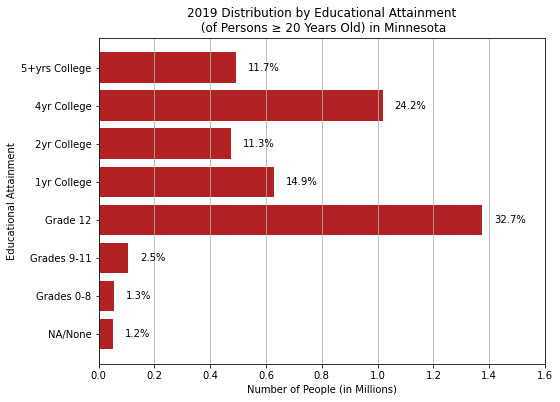

In [38]:
# Create horizontal bar chart of distribution of people by educational attainment categories

y = educat_2019dist.index
x = educat_2019dist.values

tot = educat_2019dist.sum()

educat_list = list(y)   # for tick labels

plt.figure(figsize=(8,6))

plt.barh(y=y, width=x, tick_label=educat_list, color='firebrick')

plt.grid(visible=True, axis='x')

plt.title(f"2019 Distribution by Educational Attainment\n (of Persons {8805:c} 20 Years Old) in Minnesota");

locs, labels = plt.xticks()
x_labels = [f"{num/1e6:.1f}" for num in locs]
plt.xticks(ticks=locs, labels=x_labels)

plt.ylabel('Educational Attainment')
plt.xlabel(f"Number of People (in Millions)")

# Adding text to the bars
for i in y:
    x_loc = educat_2019dist[i]
    x_prop = x_loc/tot
    pct_string = f"{x_prop:0.1%}"   # Create the string value
    plt.text(x=x_loc + .01 * tot, y=i, s=pct_string, va='center');   # Print the string value next to the bar

#### Observations

- Clearly, educational attainment in Minnesota is fairly good.  However, it is still problematic that roughly 4%-5% have not obtained at least a grade 12 education.  Given compulsory education, why are there so many (1.3%) who have not even obtained a high school education (recall that our sample is of people 20 years old or greater).  It would be interesting to investigate this further.  Could this be due to immigration?  The Twin Cities has a large population of Somali immigrants, for example.
- The figure of 1.2% seems large if "NA/None" means "None" (i.e., no schooling whatsoever) given the existence of compulsory education.  On the other hand, this might also be explained by immigration.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Employment<a name="uni_employ"></a>

**Question**:  Which employment classifications are useful for the investigation of wage income?

When looking at something like wage income, we may want to exclude people who are unemployed or not in the labor force.  We may also want to distinguish between the self-employed and the wage workers.  There are three variables concerning employment that may be useful to understand for setting those conditions.

`empstat` -- Employment Status

| Encoding | Interpretation |
|:--|:--|
| 0                  | N/A
| 1                  | Employed
| 2                  | Unemployed
| 3                  | Not in labor force

`labforce` -- Labor Force Status

| Encoding | Interpretation | 
|:--|:--|
| 0                  | N/A
| 1                  | No, not in the labor force
| 2                  | Yes, in the labor force

`classwkr` -- Class of Worker

| Encoding | Interpretation |
|:--|:--|
| 0                  | N/A
| 1                  | Self-employed
| 2                  | Works for wages

In [39]:
# Create Labor Force Dictionary
labforce_dict = {1: 'No, not in the labor force', 2: 'Yes, in the labor force'}

In [40]:
# Check that `empstat` and `labforce` agree on who is not in the labor force using XOR
# Is there anyone who is one or the other but not both?

np.logical_xor(df19.empstat == 3, df19.labforce == 1).sum()

0

In [41]:
# Check that `empstat` and `labforce` agree on N/A using XOR
# Is there anyone who is one or the other but not both?

np.logical_xor(df19.empstat == 0, df19.labforce == 0).sum()

0

In [42]:
# Is it possible to be unemployed (`empstat`) and self-employed (`classwkr`)?

np.logical_and(df19.empstat == 2, df19.classwkr == 1).sum()

40

In [43]:
# Is it possible to be unemployed (`empstat`) and work for wages (`classwkr`)?

np.logical_and(df19.empstat == 2, df19.classwkr == 2).sum()

619

In [44]:
# Examine the combinations of `empstat` values with `classwkr` values

df_empclass = df19[['empstat', 'classwkr', 'perwt']].groupby(by=['empstat', 'classwkr']).perwt.sum().to_frame()
df_empclass

perwt
empstat classwkr           
1       1          261296.0
        2         2614669.0
2       0            6320.0
        1            4520.0
        2           72575.0
3       0          796254.0
        1           55871.0
        2          389574.0

In [45]:
(df19.empstat == 0).sum()

0

Notice that there are no `empstat` 0 cases.  This means that there are no cases with employment status as 'N/A'.  Notice also that there are no cases of 'Employed' but also 'N/A' for worker classification.

In [46]:
# Feature engineering: Create a new variable `empclass` that combines `empstat` with `classwkr`

conditions = [
    (df19['empstat'] == 1) & (df19['classwkr'] == 0),
    (df19['empstat'] == 1) & (df19['classwkr'] == 1),
    (df19['empstat'] == 1) & (df19['classwkr'] == 2),
    (df19['empstat'] == 2) & (df19['classwkr'] == 0),
    (df19['empstat'] == 2) & (df19['classwkr'] == 1),
    (df19['empstat'] == 2) & (df19['classwkr'] == 2),
    (df19['empstat'] == 3) & (df19['classwkr'] == 0),
    (df19['empstat'] == 3) & (df19['classwkr'] == 1),
    (df19['empstat'] == 3) & (df19['classwkr'] == 2),
]

values = [
    'Employed & N/A',
    'Employed & Self-Employed',
    'Employed & Works for Wages',
    'Unemployed & N/A',
    'Unemployed & Self-Employed',
    'Unemployed & Works for Wages',
    'Not in Labor Force & N/A',
    'Not in Labor Force & Self-Employed',
    'Not in Labor Force & Works for Wages'
]

df19['empclass'] = np.select(conditions, values)

s_empclass = df19[['empclass', 'perwt']].groupby(by='empclass').perwt.sum()
s_empclass.sort_values(ascending=False)

empclass
Employed & Works for Wages              2614669.0
Not in Labor Force & N/A                 796254.0
Not in Labor Force & Works for Wages     389574.0
Employed & Self-Employed                 261296.0
Unemployed & Works for Wages              72575.0
Not in Labor Force & Self-Employed        55871.0
Unemployed & N/A                           6320.0
Unemployed & Self-Employed                 4520.0
Name: perwt, dtype: float64

In [47]:
# What is the unweighted break down of cases by 'empclass'

df19.empclass.value_counts()

Employed & Works for Wages              23957
Not in Labor Force & N/A                 9609
Not in Labor Force & Works for Wages     4604
Employed & Self-Employed                 3391
Not in Labor Force & Self-Employed        870
Unemployed & Works for Wages              619
Unemployed & N/A                           53
Unemployed & Self-Employed                 40
Name: empclass, dtype: int64

In [48]:
color_list = ['seagreen'] * 2 + ['chocolate'] * 6
color_list

['seagreen',
 'seagreen',
 'chocolate',
 'chocolate',
 'chocolate',
 'chocolate',
 'chocolate',
 'chocolate']

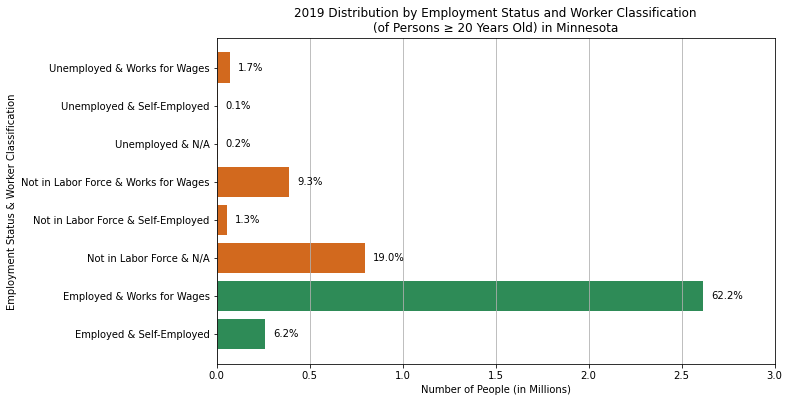

In [49]:
# Create horizontal bar chart of employment status and worker classification

y = s_empclass.index
x = s_empclass.values

tot = s_empclass.sum()

plt.figure(figsize=(10,6))

plt.barh(y=y, width=x, color=color_list)

plt.grid(visible=True, axis='x')

plt.title('2019 Distribution by Employment Status and Worker Classification\n' + 
          f"(of Persons {8805:c} 20 Years Old) in Minnesota");

locs, labels = plt.xticks()
x_labels = [f"{num/1e6:.1f}" for num in locs]
plt.xticks(ticks=locs, labels=x_labels)

plt.ylabel('Employment Status & Worker Classification')
plt.xlabel(f"Number of People (in Millions)")

# Adding text to the bars
for i in y:
    x_loc = s_empclass[i]
    x_prop = x_loc/tot
    pct_string = f"{x_prop:0.1%}"   # Create the string value
    plt.text(x=x_loc + .01 * tot, y=i, s=pct_string, va='center');   # Print the string value next to the bar

#### Observations

- People "Not in the Labor Force" are probably retirees.  This could be investigated more.  However, the aim of this investigation is to look at earned income, either via wages or self-employment.  So, for that purpose the last two categories -- the ones in green -- seem to be the most pertinent.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Earned Income -- Wages and Business Income<a name="uni_income"></a>

There are several income variables, too many to examine in detail for this project.  For this investigation, we will focus on earned income (`incearn`) in contrast to income from social security, welfare, investments, or other such sources.  Earned income breaks down into two components: wage income (`incwage`) and business income (`incbus00`).  To begin, we will focus on wage income.

The variable `incwage` reports each respondent's total pre-tax wage and salary income -- that is, money received as an employee -- for the previous year. Sources of income in `incwage` include wages, salaries, commissions, cash bonuses, tips, and other income received from an employer. Payments-in-kind or reimbursements for business expenses are not included. (From: https://usa.ipums.org/usa-action/variables/INCWAGE#description_section)

For the ACS, respondents are asked about their income in the past 12 months.  However, since respondents are surveyed throughout the year, responses from Jan 2019 will describe income from 2018 whereas responses from Dec 2019 will describe income largely from 2019.  Thus, the reference period for respondents in the same ACS year will not be the same.  It may be possible to make some adjustments for this, but IPUMS USA has tested this and found that adjustment factors across adjacent years are too small to affect results appreciably.  (For a lengthier discussion, see: https://usa.ipums.org/usa/acsincadj.shtml.)

In [50]:
# Create a list of the income variables for easy recall
income_cols = [col for col in df19.columns if 'inc' in col]
income_cols

['inctot',
 'ftotinc',
 'incwage',
 'incbus00',
 'incss',
 'incwelfr',
 'incinvst',
 'incretir',
 'incsupp',
 'incother',
 'incearn']

In [51]:
# Examine some rows of income variables
df19[income_cols + ['empclass', 'age']].head(10)

,inctot,ftotinc,incwage,incbus00,incss,incwelfr,incinvst,incretir,incsupp,incother,incearn,empclass,age
0,12000,9999999,12000,0,0,0,0,0,0,0,12000,Employed & Works for Wages,21
1,12000,9999999,0,0,12000,0,0,0,0,0,0,Not in Labor Force & N/A,74
2,8910,9999999,0,0,8900,0,10,0,0,0,0,Not in Labor Force & N/A,79
3,10300,9999999,0,0,10300,0,0,0,0,0,0,Not in Labor Force & N/A,95
4,9600,9999999,0,0,9600,0,0,0,0,0,0,Not in Labor Force & N/A,79
5,55000,9999999,40000,0,15000,0,0,0,0,0,40000,Employed & Works for Wages,39
6,4600,9999999,4600,0,0,0,0,0,0,0,4600,Unemployed & Works for Wages,20
7,450,9999999,450,0,0,0,0,0,0,0,450,Not in Labor Force & Works for Wages,27
8,5400,9999999,0,0,5400,0,0,0,0,0,0,Not in Labor Force & N/A,67
9,17000,9999999,17000,0,0,0,0,0,0,0,17000,Not in Labor Force & Works for Wages,33


In [52]:
# Get basic statistics for `incwage`
df19['incwage'].describe()

count     43143.000000
mean      34424.420601
std       53030.538372
min           0.000000
25%           0.000000
50%       19500.000000
75%       50000.000000
max      476000.000000
Name: incwage, dtype: float64

##### Investigating Wage Income -- `incwage`

From above, we see that the variable `incwage` has values ranging from \\$0 to \\$476,000.  The latter is the top-coded value for this numerical variable.  

We notice that several \\$0 values occur.  In what we see here, they occur for those "Not in Labor Force".  Are there a lot of \\$0 values, even for other `empclass` values?  We may want to exclude these from our analysis.

Also, non-zero `incwage` values occur in some cases for people who declared that they are "Unemployed" or "Not in Labor Force".  There may be all kinds of explanations behind why these people who are "Unemployed" or "Not in Labor Force" have earned and reported wages, but clearly they do not fit the standard profile of the employed, wage-earner and this is foremost what we would like to investigate.  So, we will focus on those cases whose `empclass` value is 'Employed & Works for Wages'.

We will create two masks then to use to filter the cases according to our interests for investigation.
- A mask to identify wage workers, i.e., those whose `empclass` value is 'Employed & Works for Wages'
- A mask to distinguish those who reported non-zero wage income from those who reported \\$0.

In [53]:
# Create masks as discussed above

mask_wageworker = df19['empclass'] == 'Employed & Works for Wages'
mask_zerowage = df19['incwage'] == 0

In [54]:
# Are there any employed, wage workers who reported $0 wage earnings?
# We would expect not!

df19.loc[mask_wageworker & mask_zerowage, income_cols + ['empclass', 'age']]

,inctot,ftotinc,incwage,incbus00,incss,incwelfr,incinvst,incretir,incsupp,incother,incearn,empclass,age
41078,17100,60500,0,0,17100,0,0,0,0,0,0,Employed & Works for Wages,65
42248,21100,90600,0,0,14400,0,0,0,6700,0,0,Employed & Works for Wages,70


We see two such cases of people who identified as employed, wage workers but listed \\$0 wage earnings.  Both were seniors and received a substantial portion of their total reported income from Social Security.  We will treat these as anomalies.  This observation justifies excluding these cases of people who reported \\$0 wage income from our analysis, an example of **data cleaning**.

In [55]:
# Given the two masks, there are three cases of interest 

print(f"The number of (unweighted) cases of people with zero wage income is:",
      f"{  mask_zerowage.sum()  :,}")
print(f"The number of (unweighted) cases of wageworkers with non-zero wage income is:",
      f"{  (mask_wageworker & (~mask_zerowage)).sum() :,}")
print(f"The number of (unweighted) cases of non-wageworkers with non-zero wage income is:",
      f"{  ((~mask_wageworker) & (~mask_zerowage)).sum()  :,}")

The number of (unweighted) cases of people with zero wage income is: 15,450
The number of (unweighted) cases of wageworkers with non-zero wage income is: 23,955
The number of (unweighted) cases of non-wageworkers with non-zero wage income is: 3,738


Excluding cases of zero wage income, we will examine and compare the `incwage` distribution of employed, wage workers with those who reported some other employment and worker classification.

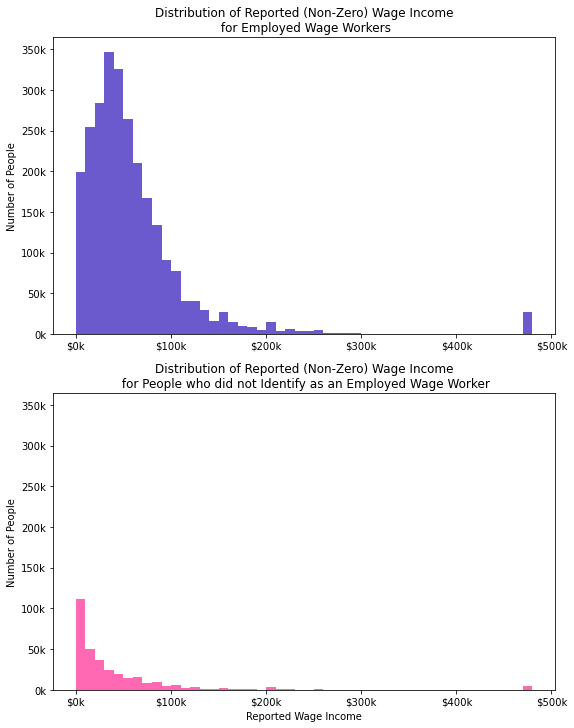

In [56]:
# Create bins
scale = 10000    # Set the rough magnitude for the bins
mult = 1        # Fine-tuning adjustment
step = mult * scale       # Create the step size from the previous
upper = (df19['incwage'].max()//scale) * scale   # Create an upper rounded number in scale magnitude
bin_edges = np.arange(0, upper + 2 * step, step).tolist()    # Create the bins


plt.figure(figsize=(9,12))

########## Plot 1
ax1 = plt.subplot(2,1,1)

plt.hist(data=df19[mask_wageworker & (~mask_zerowage)], x='incwage', 
         weights='perwt', bins=bin_edges, color="slateblue")

plt.title('Distribution of Reported (Non-Zero) Wage Income\n for Employed Wage Workers')

xlocs = [x*1e5 for x in np.arange(6)]
xlabels = [f"${num/1e3:.0f}k" for num in xlocs]
plt.xticks(ticks=xlocs, labels=xlabels)

ylocs, ylabels = plt.yticks()
ylabels = [f"{num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

plt.ylabel('Number of People')


########## Plot 2
plt.subplot(2,1,2, sharey=ax1, sharex=ax1)

plt.hist(data=df19[(~mask_wageworker) & (~mask_zerowage)], x='incwage', 
         weights='perwt', bins=bin_edges, color='hotpink')

plt.title('Distribution of Reported (Non-Zero) Wage Income\n for People who did not Identify as an Employed Wage Worker')

plt.xlabel('Reported Wage Income')
plt.ylabel('Number of People');

#### Observations

Both distributions are right-skewed.  We see also that most of those who reported non-zero wage income self-identified as employed wage workers.  On the other hand, those who self-identified in some other way but had non-zero wage income tended to report wage income figures toward the low end.

##### Investigating Earned Income (`incearn`) and Business Income (`incbus00`)

For the ACS, the variable `incearn` is the sum of the variables `incwage` and `incbus00`.  That is, earned income is just the sum of wage income and business income.  As with `incwage`, questions about income in the ACS concern the past 12 months.

The variable `incbus00` reports each respondent's net pre-income-tax self-employment income from a business, professional practice, or farm, for the past 12 months.  The figure is the amount earned after subtracting business expenses from gross receipts. It includes any money earned working for one's own concern(s). No distinction was made between incorporated and unincorporated businesses. (https://usa.ipums.org/usa-action/variables/INCBUS00#description_section)

In [57]:
# Check the claim that `incearn` is the sum of `incwage` and `incbus00`
(df19.incwage + df19.incbus00 != df19.incearn).sum()

0

As we saw, those who identified as employed sometimes identified their worker classification as "Self-Employed" as opposed to "Works for Wages".  Let us create another mask for those people -- "Employed & Self-Employed".  We might expect that those who identified as self-employed would report their earnings as business income, i.e. `incbus00`.  Is that the case?  Do many also earn wages?

We will create the following masks:

- A mask for those who self-identified as self-employed -- i.e., those whose `empclass` is "Employed & Self-Employed"
- A mask to distinguish those who listed non-zero business income from those who listed \$0.
- A mask for those who self-identified as employed, whether "Works for Wages" or "Self-Employed".

In [58]:
mask_selfemployed = df19['empclass'] == 'Employed & Self-Employed'
mask_zerobusinc = df19['incbus00'] == 0
mask_employed = df19['empstat'] == 1

In [59]:
# Given these three additional masks, we can explore the employment terrain further

print(f"The number of (unweighted) cases of people who identified as employed is:",
      f"{  mask_employed.sum()  :,}")
print()
print("EMPLOYED analysis:")
print(f"The number of (unweighted) cases of people who identified as a wage-worker is:",
      f"{  mask_wageworker.sum()  :,}")
print(f"The number of (unweighted) cases of people who identified as self-employed is:",
      f"{  mask_selfemployed.sum()  :,}")
print()
print("WAGEWORKER analysis")
print(f"The number of (unweighted) cases of wageworkers with non-zero wage income is:",
      f"{  (mask_wageworker & (~mask_zerowage)).sum() :,}")
print(f"The number of (unweighted) cases of wageworkers with zero wage income is:",
      f"{  ((mask_wageworker) & (mask_zerowage)).sum()  :,}")
print(f"The number of (unweighted) cases of wageworkers with non-zero business income is:",
      f"{  (mask_wageworker & (~mask_zerobusinc)).sum() :,}")
print(f"The number of (unweighted) cases of wageworkers with zero business income is:",
      f"{  ((mask_wageworker) & (mask_zerobusinc)).sum()  :,}")

print()
print("SELF-EMPLOYED analysis")
print(f"The number of (unweighted) cases of self-employed with non-zero wage income is:",
      f"{  (mask_selfemployed & (~mask_zerowage)).sum() :,}")
print(f"The number of (unweighted) cases of self-employed with zero wage income is:",
      f"{  ((mask_selfemployed) & (mask_zerowage)).sum()  :,}")
print(f"The number of (unweighted) cases of self-employed with non-zero business income is:",
      f"{  (mask_selfemployed & (~mask_zerobusinc)).sum() :,}")
print(f"The number of (unweighted) cases of self-employed with zero business income is:",
      f"{  ((mask_selfemployed) & (mask_zerobusinc)).sum()  :,}")

The number of (unweighted) cases of people who identified as employed is: 27,348

EMPLOYED analysis:
The number of (unweighted) cases of people who identified as a wage-worker is: 23,957
The number of (unweighted) cases of people who identified as self-employed is: 3,391

WAGEWORKER analysis
The number of (unweighted) cases of wageworkers with non-zero wage income is: 23,955
The number of (unweighted) cases of wageworkers with zero wage income is: 2
The number of (unweighted) cases of wageworkers with non-zero business income is: 1,103
The number of (unweighted) cases of wageworkers with zero business income is: 22,854

SELF-EMPLOYED analysis
The number of (unweighted) cases of self-employed with non-zero wage income is: 1,642
The number of (unweighted) cases of self-employed with zero wage income is: 1,749
The number of (unweighted) cases of self-employed with non-zero business income is: 2,316
The number of (unweighted) cases of self-employed with zero business income is: 1,075


#### Observations

NOTE: These observations primarily concern the unweighted sample, not the population.  However, inasmuch as the representativeness of the sample depends on weights being applied to unweighted cases -- and, hence, depends also on the quantity of unweighted cases -- the unweighted sample represents the population in a very rough-grained way.

- Roughly 7 times as many cases who identified as employed identified as a wage-worker versus self-employed.
- Only 2 cases (a very small number) of wageworkers reported zero wage income.
- The bulk of wageworkers obtained their earned income from wages as opposed to business income.
- On the other hand, among those who identified as self-employed, roughly two thirds as many reported non-zero wage income as those who reported non-zero business income, making these roughly similar in magnitude.
- Moreover, a large number (roughly one third) of the self-employed reported zero business income, undermining a strong pairing between the self-employed and business income like there is a strong pairing between wage workers and wage income.

From now on, when looking at wage and business income, we will be concerned to look at the non-zero responses on those variables.

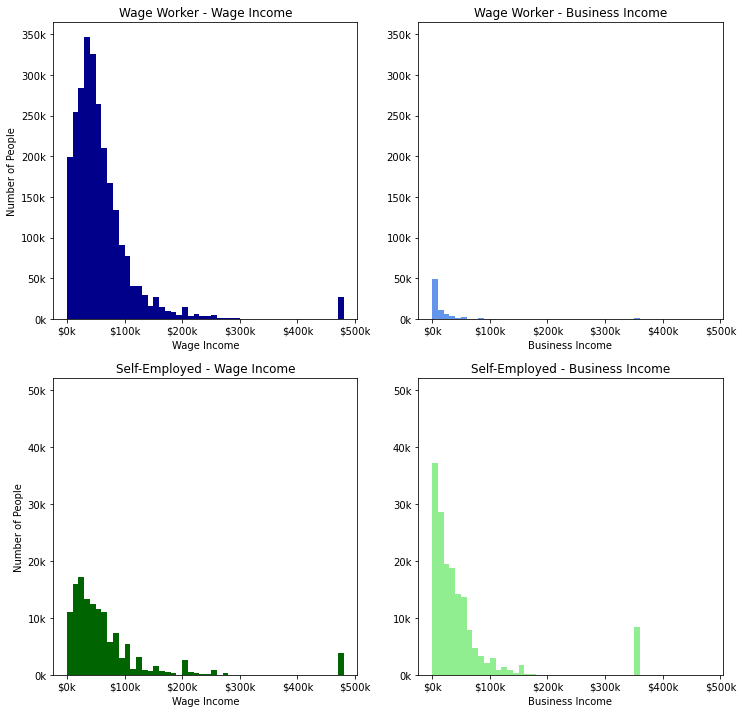

In [60]:
plt.figure(figsize=(12,12))

scale = 10000
mult = 1
step = mult * scale
upper = (df19['incwage'].max()//scale) * scale
bin_edges = np.arange(0, upper + 2 * step, step).tolist()


########### Plot 1
ax1 = plt.subplot(2,2,1)

plt.hist(data=df19[mask_wageworker & (~mask_zerowage)], 
         x='incwage', weights='perwt', bins=bin_edges,
         color='darkblue')

plt.title('Wage Worker - Wage Income')

plt.xlabel('Wage Income')
plt.ylabel('Number of People')

xlocs, xlabels = plt.xticks()  # Get locations and labels
xlocs = xlocs[1:-1]    # Remove first and last
xlabels = [f"${num/1e3:.0f}k" for num in xlocs]
plt.xticks(ticks=xlocs, labels=xlabels)

ylocs, ylabels = plt.yticks()   # Get locations and labels
ylabels = [f"{num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)


########## Plot 2
ax2 = plt.subplot(2,2,2, sharey=ax1, sharex=ax1)

plt.hist(data=df19[mask_wageworker & (~mask_zerobusinc)], 
         x='incbus00', weights='perwt', bins=bin_edges,
         color='cornflowerblue')

plt.title('Wage Worker - Business Income')

plt.xlabel('Business Income')



########### Plot 3
ax3 = plt.subplot(2,2,3, sharex=ax1)

plt.hist(data=df19[mask_selfemployed & (~mask_zerowage)], 
         x='incwage', weights='perwt', bins=bin_edges,
         color='darkgreen')

plt.ylim(0, ax1.get_ylim()[1] / 7)

ylocs, ylabels = plt.yticks()
ylocs = ylocs[:-1]    # Drop the last one
ylabels = [f"{num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

plt.title('Self-Employed - Wage Income')

plt.xlabel('Wage Income')
plt.ylabel('Number of People')

############ Plot 4
ax4 = plt.subplot(2,2,4, sharex=ax1, sharey=ax3)

plt.hist(data=df19[mask_selfemployed & (~mask_zerobusinc)], 
         x='incbus00', weights='perwt', bins=bin_edges,
         color='lightgreen')

plt.title('Self-Employed - Business Income')

plt.xlabel('Business Income');

#### Observations 

- Note that the y-scale for self-employed workers is one seventh what it is for wage workers consistent with the fact that the proportion of wage workers to self-employed is about 7-to-1 in the (unweighted) sample.
- We see top-coded values for both wage income and for business income.
- Again, we see that most wage workers' earned income is obtained through wages rather than business income.
- On the other hand, self-employed workers report income from both avenues -- wages and business income.

#### Question

We have seen that people report wage income under a variety of circumstances, some circumstances suggesting that they do not fit the profile of a typical employed wageworker -- for example, someone who identifies as "Not in Labor Force" and yet reported wage income.  This suggests that, in analyzing wage income, we should restrict our attention to only certain employment classifications.  Clearly, those who indicated that they were employed and that they work for wages should be included -- namely, those cases with the value "Employed & Works for Wage" of the variable `empclass` -- but should others be included as well?  In particular, should those who identified as employed and, moreover, as self-employed be included?  We see above that a substantial proportion of those people report wage income and the magnitude of individual income reported is not trivial (in other words, it is not primarily low wages, which could be interpreted as supplementary to their business income, that is reported). 

The category of those who identified as "Employed" (`empstat` value of 1) divides into those who identified as "Works for Wages" (`classwkr` value of 2) and those who identified as "Self-Employed" (`classwkr` value of 1).

- How much does adding the self-employed to the class of self-identified wage workers impact the distribution of wage income?

In [61]:
maxincwage = df19.incwage.value_counts().sort_index().index.max()
maxincwage_wt = df19[df19.incwage == maxincwage].perwt.sum()
maxincwage, maxincwage_wt

(476000, 31372.0)

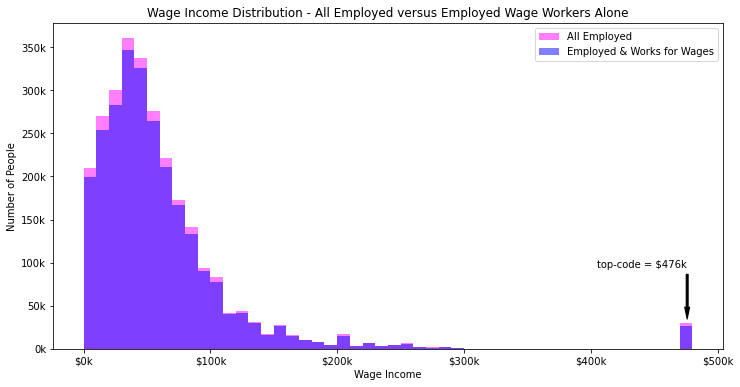

In [62]:
plt.figure(figsize=(12,6))

scale = 10000
mult = 1
step = mult * scale
upper = (df19['incwage'].max()//scale) * scale
bin_edges = np.arange(0, upper + 2 * step, step).tolist()


plt.hist(data=df19[mask_employed & (~mask_zerowage)],
         x='incwage', 
         weights='perwt', 
         bins=bin_edges,
         alpha=0.5, 
         color='magenta',
         label='All Employed')

plt.hist(data=df19[mask_wageworker & (~mask_zerowage)], 
         x='incwage', 
         weights='perwt', 
         bins=bin_edges, 
         alpha=0.5,
         color='blue',
         label='Employed & Works for Wages')

plt.title('Wage Income Distribution - All Employed versus Employed Wage Workers Alone')

plt.xlabel('Wage Income')
plt.ylabel('Number of People')

xlocs, xlabels = plt.xticks()  # Get locations and labels
xlocs = xlocs[1:-1]    # Remove first and last
xlabels = [f"${num/1e3:.0f}k" for num in xlocs]
plt.xticks(ticks=xlocs, labels=xlabels)

ylocs, ylabels = plt.yticks()
ylocs = ylocs[:-1]    # Drop the last one
ylabels = [f"{num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

plt.legend(loc='upper right')

ax = plt.gca()
ax.annotate(f"top-code = ${maxincwage/1e3:,.0f}k", 
            xy=(maxincwage, maxincwage_wt), 
            xytext=(maxincwage, maxincwage_wt * 3),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=5),
            horizontalalignment='right');

#### Decision for Subsequent Analyses

For simplicity in the subsequent analyses, we must decide when looking at wage income whether to include those who identified as self-employed and thus examine the whole class of people who identified as "Employed" or merely those who identified as "Employed & Works for Wages".  Regardless, we will continue to exclude cases that reported zero wage income.  We have already seen that those who identified as self-employed often report substantial wage incomes.  Moreover, we see here that including those people in our analysis does not alter the shape of the distribution of wage income appreciably.  It simply adds more cases per bin, especially at the lower levels (say, below $110k).  So, in the following analyses we will only restrict cases to those who indicated that they were "Employed" (and reported non-zero wage income) regardless of whether they self-identified as "Works for Wages" or as "Self-Employed".

#### Create DataFrame of Employed Wage Earners

For the following analyses, then, we will create a dataframe consisting only of people who self-identified as employed and with a non-zero wage income.  We will call these people **employed wage earners**.  We will also drop columns that we are unlikely to use going forward.

In [63]:
df19.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hhwt', 'cluster', 'cpi99',
       'statefip', 'strata', 'gq', 'pernum', 'perwt', 'sex', 'age', 'marst',
       'race', 'raced', 'hispan', 'hispand', 'rachsing', 'educ', 'educd',
       'empstat', 'empstatd', 'labforce', 'classwkr', 'classwkrd', 'occ1990',
       'occ2010', 'inctot', 'ftotinc', 'incwage', 'incbus00', 'incss',
       'incwelfr', 'incinvst', 'incretir', 'incsupp', 'incother', 'incearn',
       'erscor90', 'agecat', 'educat', 'empclass'],
      dtype='object')

In [64]:
new_cols = ['perwt', 'sex', 'age', 'marst', 'rachsing', 'empstat', 'incwage',
       'incbus00', 'incearn', 'erscor90', 'agecat', 'educat', 'empstat', 'labforce', 'empclass']

In [65]:
df19wages = df19[mask_employed & (~mask_zerowage)][new_cols]
df19wages.shape

(25597, 15)

In [66]:
df19wages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25597 entries, 0 to 43142
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   perwt     25597 non-null  float64 
 1   sex       25597 non-null  int64   
 2   age       25597 non-null  int64   
 3   marst     25597 non-null  int64   
 4   rachsing  25597 non-null  int64   
 5   empstat   25597 non-null  int64   
 6   incwage   25597 non-null  int64   
 7   incbus00  25597 non-null  int64   
 8   incearn   25597 non-null  int64   
 9   erscor90  25597 non-null  float64 
 10  agecat    25597 non-null  category
 11  educat    25597 non-null  category
 12  empstat   25597 non-null  int64   
 13  labforce  25597 non-null  int64   
 14  empclass  25597 non-null  object  
dtypes: category(2), float64(2), int64(10), object(1)
memory usage: 2.8+ MB


#### Note

This data frame is the basis for the upcoming analyses.  So, for the subsequent analyses, the effective sample size is 25,597 cases.  Weightings are applied to these cases to provide representative statistics.

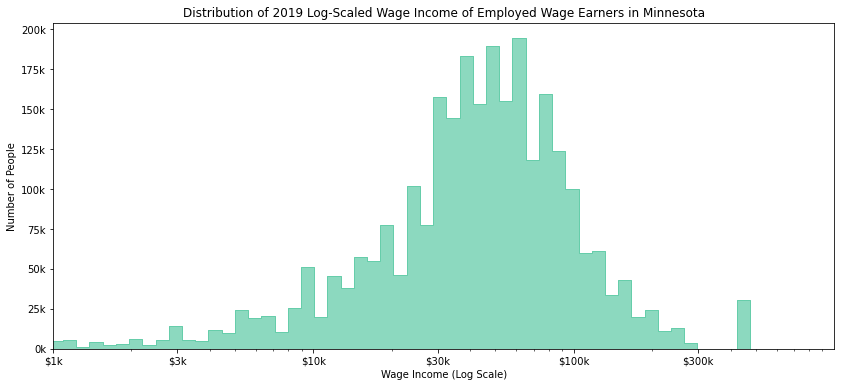

In [67]:
# Create Log-Scaled Histogram of Wage Income

xticks = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
xlabels = [f"${v/1e3:n}k" for v in xticks]
#print(xlabels)

plt.figure(figsize=(14,6))

sb.histplot(data=df19wages, 
            x='incwage', 
            weights='perwt',
            bins=100, 
            log_scale=[True, False], 
            element='step', 
            color='mediumaquamarine')

plt.title('Distribution of 2019 Log-Scaled Wage Income of Employed Wage Earners in Minnesota')

plt.xlabel('Wage Income (Log Scale)')

plt.ylabel('Number of People')

plt.xticks(ticks=xticks, labels=xlabels)

ylocs, ylabels = plt.yticks()
ylocs = ylocs[:-1]    # Drop the last one
ylabels = [f"{num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

plt.xlim(1000,1e6);

#### Observations

Using a log scale, we can see the distribution of lower incomes better.  We see that the main peak extends from about \\$30,000 to \\$100,000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?  Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Person weight (`perwt`) was the first variable explored since that is used in many of the subsequent visualizations in order to make the sample representative of the population.  This variable was strongly right-skewed.  In order to better visualize the distribution of the lower values (where most of the action was present), a log transform was used.

A second age variable was engineered from the age variable available from the IPUMS dataset.  The IPUMS age variable is a numerical variable conveying the age in years of the respondent.  A second, categorical, age variable (`agecat`) was created in order to consider age groups such as people in their 20s, 30s, 40s, etc.

It had been decided at the start to investigate earned income, and in particular income earned from wages as opposed to income from a business.  How those income variables were related was explored.  It became clear that people reported wage income who did not meet the standard image of an employee working for wages, for example, people who reported not being in the labor force. Variables on employment status, labor force status, and worker classification were investigated, and even engineered, to better understand and make a decision on how to constrain the cases of interest in looking at wage income. 

It was decided that the income variable that will be the focus of interest in the subsequent analyses is wage income (`incwage`) and that only cases with an employment status of "Employed" and who reported a non-zero wage would qualify for inclusion in the domain of the analysis.  Wage income (`incwage`) is right-skewed, as one might expect, and has a top-coded value of \$476,000.  It will be explored using the following variables in the upcoming analyses:

- [Age (numerical)](#uni_agedistro): `age`
- [Age (categorical)](#uni_agecat): `agecat` (engineered)
- [Sex](#uni_sex): `sex`
- [Marital Status](#uni_marst): `marst`
- [Race/Ethnicity](#uni_race): `rachsing`
- [Educational Attainment](#uni_educat): `educat` (engineered)  

Age distribution exhibits an interesting "divot" in the middle representing people in their mid-40s to mid-50s.  This corresponds with people born during the Vietnam War, a possible explanation for the "divot".

The sex ratio (ratio of males to females) was found to be slightly less than one.

Roughly a quarter were never married/single. And a little more than half were married with the spouse present.

Whites made up a majority of the population in Minnesota in 2019.  The minority populations of Blacks, Asians, and Hispanics were of roughly equal size.  The American Indian population was surprisingly much smaller by comparison with the sizes of the other minorities.

Educational attainment in Minnesota was pretty good, albeit roughly 4-5\% had not attained at least a 12th grade education.





***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

## Bivariate Exploration<a name="bivariate"></a>

- [Wage Income by Age](#bi_age)
- [Wage Income by Sex](#bi_sex)
- [Wage Income by Marital Status](#bi_marst)
- [Wage Income by Race\Ethnicity](#bi_race)
- [Wage Income by Educational Attainment](#bi_educat)
- [Educational Attainment by Race/Ethnicity](#bi_edurace)
- [Educational Attainment by Age Category under 50](#bi_eduage)


#### Create Expanded DataFrame in Place of Weights

Not all data visualization tools include parameters to add weights.  We can get around this by creating an expanded dataframe that contains as many duplicates of a row as the weight for that row.

In [68]:
# From Stackoverflow: https://stackoverflow.com/questions/58053594/how-to-create-a-boxplot-from-data-with-weights

def expand_df(df, weight_col):
    """expand the dataframe 
    so that rows are repeated as many times 
    as dictated by the values in weight_col"""
    df = df.reindex(df.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

In [69]:
# Create expanded DataFrame as described above

df19wages_expanded = expand_df(df=df19wages, weight_col='perwt')
df19wages_expanded.shape

(2746113, 15)

In [70]:
# Check that the number of rows of the expanded DataFrame matches the sum of all the weights
df19wages.perwt.sum()

2746113.0

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Wage Income by Age<a name="bi_age"></a>

**Question**: What is the distribution of wage income by age?

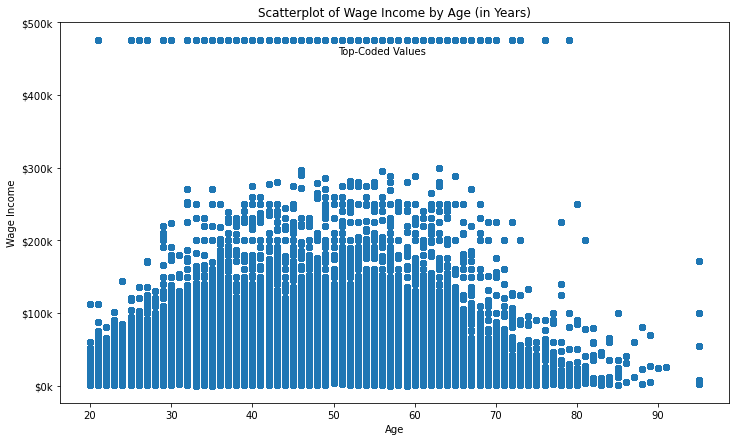

In [71]:
# Create Scatterplot of Wage Income by Ages-Numerical

import statistics
median_age = statistics.median(df19wages.age.unique().tolist())

plt.figure(figsize=(12,7))

plt.scatter(data=df19wages_expanded, x='age', y='incwage')

plt.title('Scatterplot of Wage Income by Age (in Years)')

plt.xlabel('Age')
plt.ylabel('Wage Income')

ylocs, ylabels = plt.yticks()
ylocs = ylocs[1:]    # Drop the last one
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

plt.text(x=median_age, y=maxincwage - 2e4, s='Top-Coded Values', ha='center');

#### Observations

From this scatterplot, you can see the climb in higher wages at the lower ages (from, say, 20 to 30) and the decline in higher wages in the higher ages (say, 65 and onward).  There is a lot of overplotting, no doubt; so the density of wages at age-wage locations in the map is not visible.

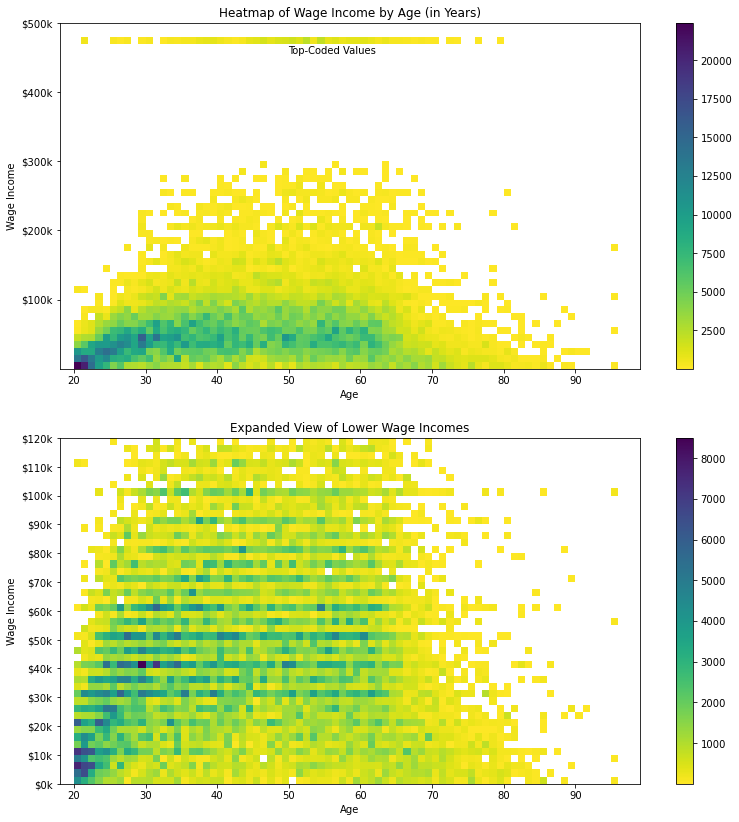

In [72]:
# Create Heatmap of Wage Income by Age

plt.figure(figsize=(13,14))

###### Plot 1
plt.subplot(2,1,1)

# Specify bin edges 
bins_x = np.arange(18, 100, 1)
bins_y = np.arange(0, 5e5, 1e4)

plt.hist2d(data=df19wages_expanded, x='age', y='incwage', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Wage Income')

plt.title('Heatmap of Wage Income by Age (in Years)')

ylocs, ylabels = plt.yticks()
ylocs = ylocs[1:]    # Drop the last one
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

plt.text(x=median_age, y=maxincwage - 2e4, s='Top-Coded Values', ha='center')



###### Plot 2
plt.subplot(2,1,2)

# Specify bin edges 
bins_x = np.arange(18, 100, 1)
bins_y = np.arange(0, 5e5, 2.5e3)

plt.hist2d(data=df19wages_expanded, x='age', y='incwage', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()

# Title, Labels, and Ticks
plt.xlabel('Age')
plt.ylabel('Wage Income')

plt.title('Expanded View of Lower Wage Incomes')

ylocs, ylabels = plt.yticks()
ylocs = np.linspace(0,1.2e5, 13)
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

# Change y limits
plt.ylim(0, 1.2e5);

#### Observations

These heatmaps have the advantage over the previous scatterplot of making visible the density of people at various age-wage locations.  One notices the bands of green running horizontally about every \\$10k and which stand out prominently at \\$30k, \\$40k, \\$50k, and \\$60k.  What also stands out are the bottom wages in dark blue at the bottom left corner that are earned by many people ages 20-22.  Could these people be college students with part time employment and low paying jobs?

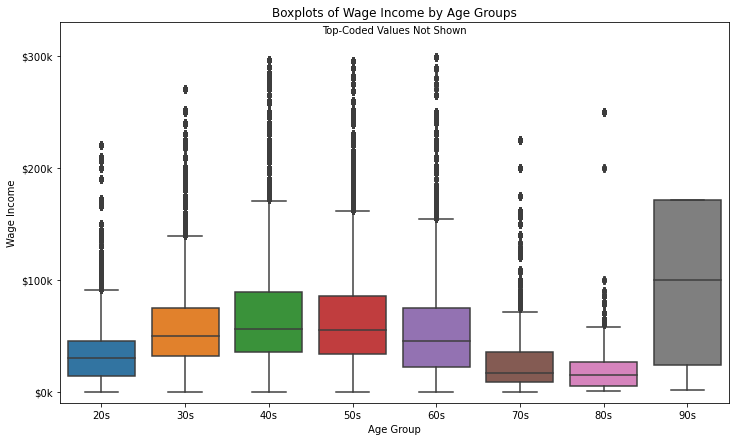

In [73]:
# Create Boxplots of Wage Income by Age Groups

plt.figure(figsize=(12,7))

sb.boxplot(data=df19wages_expanded, x='agecat', y='incwage')

# Title, Labels, and Ticks
plt.title('Boxplots of Wage Income by Age Groups')

plt.xlabel('Age Group')
plt.ylabel('Wage Income')

xlocs, xlabels = plt.xticks()

ylocs, ylabels = plt.yticks()
ylocs = ylocs[1:]    # Drop the last one
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

# Text
plt.text(x=(len(xlocs)/2 - 0.5), y=3.2e5, s='Top-Coded Values Not Shown', ha='center')

# Change y limits
plt.ylim(-1e4, 3.3e5);

#### Observations

- We see that employed people on average achieve their highest wages in their 40s and 50s.  
- Why is the 60s boxplot lower than the 40s and 50s?  One might speculate that this is to be expected because higher wage earners would be better prepared to retire in their 60s and, thus, remove themselves from the category of employed wage earners.  This would also explain the lower boxplots for the 70s and 80s.  Those who continue to be employed into their 70s and 80s are more likely to be those who by earning lower wages were not set to retire at an earlier age.
- The 90s boxplot is likely so extended as compared to the previous ones because of very small numbers in the sample.  Most people are not employed wage earners into their 90s.

In [74]:
# Investigate the sample size of wage earners in their 90s

samp90s = (df19wages['agecat'] == '90s').sum()
pop90s = df19wages[df19wages['agecat'] == '90s'].perwt.sum()

f"There are {samp90s} wage earners in the sample in their 90s with an estimated representation of {pop90s:.0f} people."

'There are 7 wage earners in the sample in their 90s with an estimated representation of 620 people.'

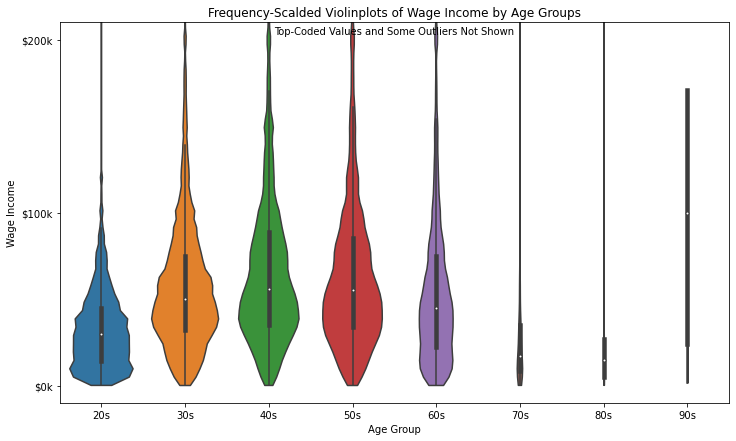

In [75]:
# Create Frequency-Scaled Violinplots of Wage Income by Age Groups

plt.figure(figsize=(12,7))

sb.violinplot(data=df19wages_expanded, x='agecat', y='incwage',
              scale='count',
              cut=0)

# Title, Labels, and Ticks
plt.title('Frequency-Scalded Violinplots of Wage Income by Age Groups')

plt.xlabel('Age Group')
plt.ylabel('Wage Income')

xlocs, xlabels = plt.xticks()

ylocs, ylabels = plt.yticks()
ylocs = ylocs[1:]    # Drop the last one
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

# Change y limits
ylim_top = 2.1e5
plt.ylim(-1e4,ylim_top)

# Add text
plt.text(x=(len(xlocs)/2 - 0.5), y=ylim_top * (1 - 0.033), 
         s='Top-Coded Values and Some Outliers Not Shown', ha='center');

#### Observations
These frequency-scaled violinplots illustrate the removal of wage earners from the labor force starting with the 60s category and continuing with higher age categories.  That the inner boxplots sink lower starting in the 60s shows that higher wage earners have left the labor force in greater proportion.

#### Transfer of People Out of the Labor Force

**Question**: What does the transfer of people out of the labor force at higher ages look like?

In [76]:
labforce_dist = df19[['perwt', 'agecat', 'labforce']].groupby(by=['agecat', 'labforce']).perwt.sum()
labforce_dist

agecat  labforce
20s     1            94518.0
        2           639375.0
30s     1            91504.0
        2           674427.0
40s     1            69515.0
        2           611037.0
50s     1           113994.0
        2           611171.0
60s     1           321226.0
        2           354923.0
70s     1           335021.0
        2            59841.0
80s     1           170880.0
        2             7971.0
90s     1            45041.0
        2              635.0
Name: perwt, dtype: float64

In [77]:
labforce_dist_list = labforce_dist.to_list()
labforce_dist_list_exp = []
x_labels = []

for x, y in enumerate(labforce_dist_list):
    labforce_dist_list_exp.append(labforce_dist_list[x])
    if x%2 != 0:
        labforce_dist_list_exp.append(0)

for i in range(len(df19.agecat.cat.categories)):
    x_labels.append(df19.agecat.cat.categories[i])
    x_labels.append('')
    x_labels.append('')


In [78]:
df19.agecat.cat.categories

Index(['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'], dtype='object')

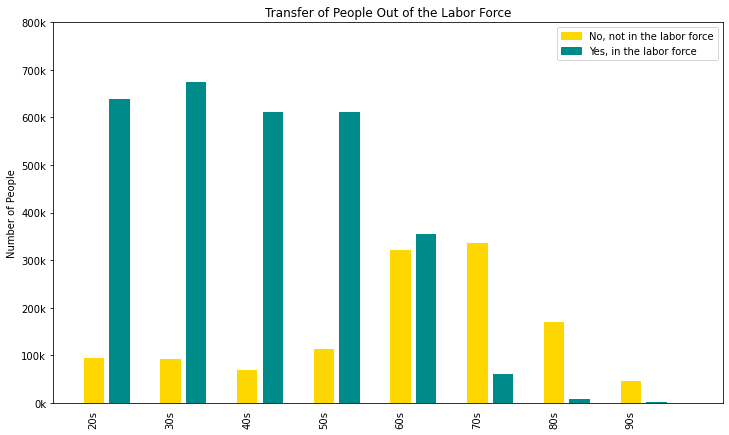

In [79]:
plt.figure(figsize=(12,7))


# Create Bars
plt.bar(height=labforce_dist_list_exp, 
        x=np.arange(0, len(x_labels)), 
        tick_label=x_labels, 
        color=['gold', 'darkcyan', 'blue'] * (len(df19.agecat.cat.categories))
        )

# Title, Labels, and Ticks
plt.xticks(rotation=90)

# Remove x_ticks: https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

ylocs, ylabels = plt.yticks()
ylabels = [f"{num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

plt.ylabel('Number of People')

plt.title('Transfer of People Out of the Labor Force')

# Create Legend: 
# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column

colors = {'No, not in the labor force':'gold', 'Yes, in the labor force':'darkcyan'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

#### Observations

This graphic illustrates the transfer of people out of the labor force starting in the 60s age category.  This transfer occurs alongside the overall decrease in people with increasing age due to mortality.  It helps to explain the decrease in wage incomes at the higher age categories; people retire and leave the labor force.  If those that retire early, or retire at all, are predominantly those in better financial shape, then that would leave mostly lower income wage earners in the labor force and it would explain the drop in wage income for the population at higher ages that was illustrated in previous graphics.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Wage Income by Sex<a name="bi_sex"></a>

**Question**: How does the distribution of wage income vary with sex?

In [80]:
sex_2019dist = df19wages[['sex', 'perwt']].groupby(by='sex').perwt.sum()
sex_2019dist

sex
1    1419296.0
2    1326817.0
Name: perwt, dtype: float64

In [81]:
f"The sex ratio (i.e., the ratio of males to females) is: {sex_2019dist[1]/sex_2019dist[2]:.2f}"

'The sex ratio (i.e., the ratio of males to females) is: 1.07'

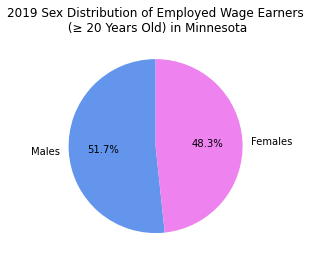

In [82]:
# Create pie chart showing proportion by sex of employed wage earners

plt.pie(x=sex_2019dist, labels=['Males', 'Females'], 
        colors=['cornflowerblue', 'violet'], 
        startangle=90, autopct='%1.1f%%')

plt.title(f"2019 Sex Distribution of Employed Wage Earners\n ({8805:c} 20 Years Old) in Minnesota");

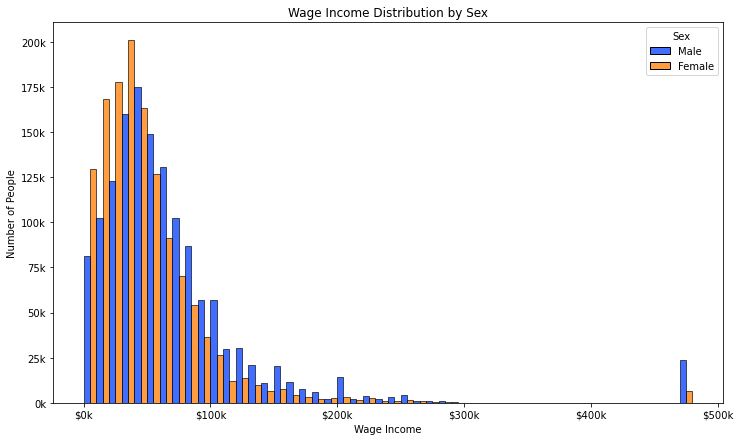

In [83]:
# Create Count Frequency Histograms of Wage Income Distribution with Bins Clustered by Sex

scale = 10000
mult = 1
step = mult * scale
upper = (df19wages.incwage.max()//scale) * scale
bin_edges = np.arange(0, upper + 2 * step, step).tolist()

plt.figure(figsize=(12,7))

sb.histplot(data=df19wages, 
            x='incwage', 
            hue='sex', 
            hue_order=[1, 2], 
            bins=bin_edges, 
            palette='bright', 
            multiple='dodge', 
            weights='perwt')

plt.title('Wage Income Distribution by Sex')

plt.xlabel('Wage Income')
plt.ylabel('Number of People')

xlocs, xlabels = plt.xticks()  # Get locations and labels
xlocs = xlocs[1:-1]    # Remove first and last
xlabels = [f"${num/1e3:.0f}k" for num in xlocs]
plt.xticks(ticks=xlocs, labels=xlabels)

ylocs, ylabels = plt.yticks()
ylocs = ylocs[:-1]    # Drop the last one
ylabels = [f"{num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

ax = plt.gca()

# From: https://stackoverflow.com/questions/66346542/customizing-legend-in-seaborn-histplot-subplots

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Male', 'Female'], title='Sex');

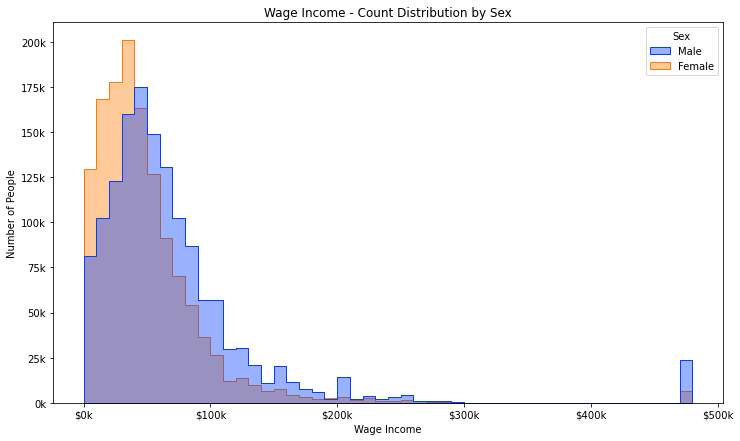

In [84]:
# Create Overlapping Count Frequency Histograms by Sex of Wage Income Distribution

scale = 10000
mult = 1
step = mult * scale
upper = (df19wages.incwage.max()//scale) * scale
bin_edges = np.arange(0, upper + 2 * step, step).tolist()


plt.figure(figsize=(12,7))

sb.histplot(data=df19wages, 
            x='incwage', 
            hue='sex', 
            hue_order=[1, 2], 
            bins=bin_edges, 
            stat='count',
            palette='bright', 
            multiple='layer', 
            weights='perwt',
            element='step', 
            alpha=0.4)

plt.title('Wage Income - Count Distribution by Sex')

plt.xlabel('Wage Income')
plt.ylabel('Number of People')

xlocs, xlabels = plt.xticks()  # Get locations and labels
xlocs = xlocs[1:-1]    # Remove first and last
xlabels = [f"${num/1e3:.0f}k" for num in xlocs]
plt.xticks(ticks=xlocs, labels=xlabels)

ylocs, ylabels = plt.yticks()
ylocs = ylocs[:-1]    # Drop the last one
ylabels = [f"{num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

ax = plt.gca()

# From: https://stackoverflow.com/questions/66346542/customizing-legend-in-seaborn-histplot-subplots

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Male', 'Female'], title='Sex');

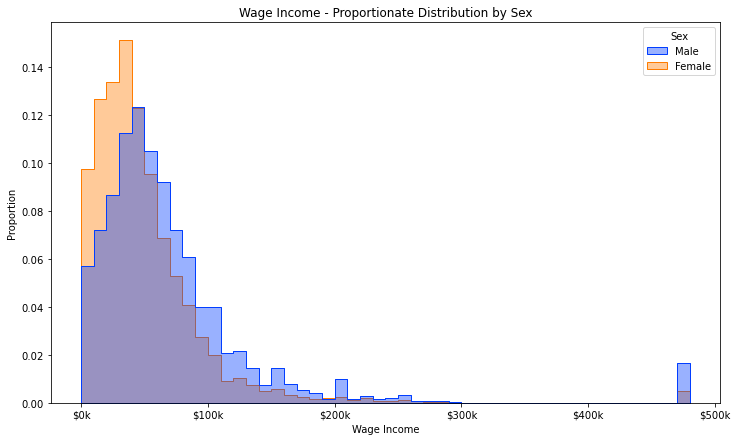

In [85]:
# Create Overlapping Relative Frequency Histograms by Sex of Wage Income Distribution

scale = 10000
mult = 1
step = mult * scale
upper = (df19wages.incwage.max()//scale) * scale
bin_edges = np.arange(0, upper + 2 * step, step).tolist()


plt.figure(figsize=(12,7))

sb.histplot(data=df19wages, 
            x='incwage', 
            hue='sex', 
            hue_order=[1, 2], 
            bins=bin_edges, 
            stat='proportion',
            common_norm=False,
            palette='bright', 
            multiple='layer', 
            weights='perwt',
            element='step', 
            alpha=0.4)

plt.title('Wage Income - Proportionate Distribution by Sex')

plt.xlabel('Wage Income')
plt.ylabel('Proportion')

xlocs, xlabels = plt.xticks()  # Get locations and labels
xlocs = xlocs[1:-1]    # Remove first and last
xlabels = [f"${num/1e3:.0f}k" for num in xlocs]
plt.xticks(ticks=xlocs, labels=xlabels)


ax = plt.gca()

# From: https://stackoverflow.com/questions/66346542/customizing-legend-in-seaborn-histplot-subplots

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Male', 'Female'], title='Sex');

#### Observations

The previous three histogram visualizations are quite similar.  The first two show count frequencies, the first using clustered bars/bins and the second using overlapping histograms.  The third differs from the second in being a relative frequency histogram with the bin heights corresponding to the overall proportion in each group.  The second and third visualizations are only slightly different because the quantities of males and females are so close.  A relative frequency histogram is preferable for making comparisons about proportionate differences between the two groups.

What we see in all three cases is that females dominate males (by count or proportion) at lower incomes and males dominate females (by count or proportion) at higher incomes.


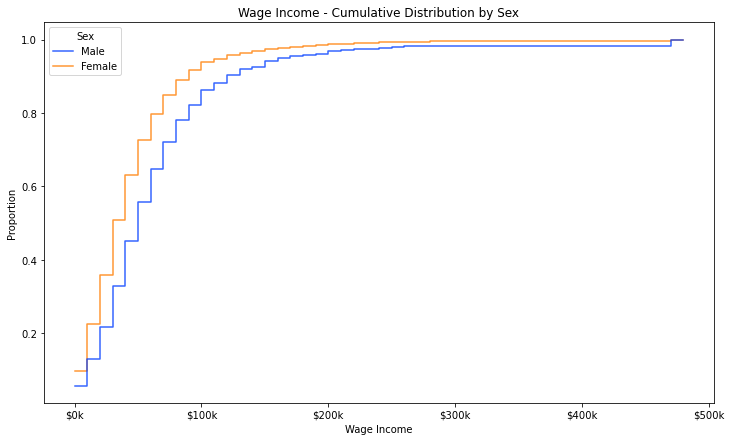

In [86]:
# Create Cumulative Distribution Curves by Sex of Wage Income

scale = 10000
mult = 1
step = mult * scale
upper = (df19wages.incwage.max()//scale) * scale
bin_edges = np.arange(0, upper + 2 * step, step).tolist()


plt.figure(figsize=(12,7))

sb.histplot(data=df19wages, 
            x='incwage', 
            hue='sex', 
            hue_order=[1, 2], 
            bins=bin_edges, 
            stat='proportion',
            cumulative=True,
            common_norm=False,
            palette='bright', 
            multiple='layer', 
            weights='perwt',
            element='step', 
            alpha=0.8,
            fill=False)

plt.title('Wage Income - Cumulative Distribution by Sex')

plt.xlabel('Wage Income')
plt.ylabel('Proportion')

xlocs, xlabels = plt.xticks()  # Get locations and labels
xlocs = xlocs[1:-1]    # Remove first and last
xlabels = [f"${num/1e3:.0f}k" for num in xlocs]
plt.xticks(ticks=xlocs, labels=xlabels)


ax = plt.gca()

# From: https://stackoverflow.com/questions/66346542/customizing-legend-in-seaborn-histplot-subplots

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['Male', 'Female'], title='Sex');

#### Observations

- The female category picks up a greater proportion of its distribution at the lower income values than the male category exhibited by the steeper average incline at the lower values.  Alternatively, the male curve adds a greater proportion at higher values, say after $100,000.  Both show that, proportionately, men have higher incomes than women.  That is, the proportion of men with high incomes among men is greater than the proportion of women with high incomes among women.

Although this is an interesting observation, it should not be interpreted as straightforward evidence of wage inequality.  Other factors would need to be considered to make that judgement, such as comparing men versus women in the same occupation, the same job title, and doing equivalent work.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Wage Income by Marital Status<a name="bi_marst"></a>

**Question**: Does the distribution of wage income vary by marital status?

In [87]:
marst_dict.keys(), marst_dict.values()

(dict_keys([1, 2, 3, 4, 5, 6]),
 dict_values(['Married,\n spouse present', 'Married,\n spouse absent', 'Separated', 'Divorced', 'Widowed', 'Never\n married/Single']))

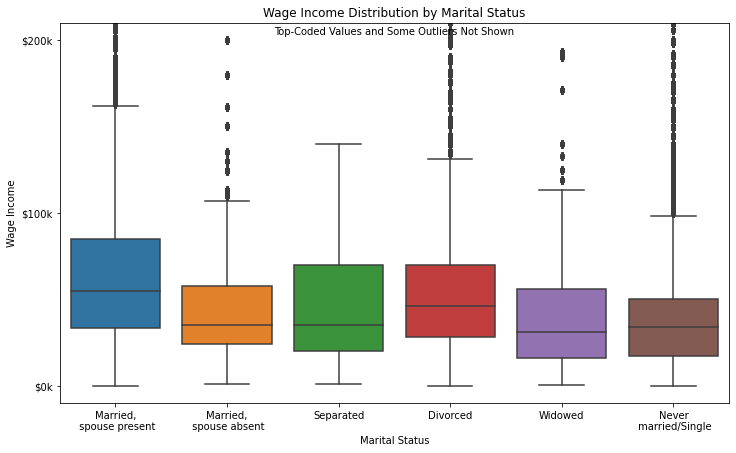

In [88]:
# Create boxplots of wage income by marital status

plt.figure(figsize=(12,7))

sb.boxplot(data=df19wages_expanded, x='marst', y='incwage', order=marst_dict.keys())


# Title, Labels, and Ticks
plt.title('Wage Income Distribution by Marital Status')

plt.xlabel('Marital Status')
plt.ylabel('Wage Income')

xlocs, xlabels = plt.xticks()  # Get locations and labels
#print(xlocs, xlabels)
plt.xticks(ticks=xlocs, labels=marst_dict.values())

ylocs, ylabels = plt.yticks()  # Get locations and labels
ylocs = ylocs[1:-1]    # Remove first and last
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

# Change y limits
ylim_top = 2.1e5
plt.ylim(-1e4,ylim_top)

# Add text
plt.text(x=(len(xlocs)/2 - 0.5), y=ylim_top * (1 - 0.033), 
         s='Top-Coded Values and Some Outliers Not Shown', ha='center');

#### Observations

- There is a noticeable difference between the category of "Married, spouse present" and the category of "Never married/Single".  Is marital status an effect or a cause here?  It could be that those who have greater career ambitions are also more likely to get married.
- The category of "Married, spouse present" seems to dominate the other categories connected with being or having been married.
- It is surprising that the category of "Widowed" is proportionately lower than the category of "Divorced" since one might expect the situations to be somewhat similar since in both situations the marriage with one's spouse has been terminated.

In [89]:
# order marital status by medians of incwage
marst_medianorder = (df19wages_expanded[['marst', 'incwage']]
                    .groupby(by='marst')
                    .incwage.median()
                    .sort_values(ascending=False))

marst_medianorder

marst
1    55000.0
4    46000.0
3    35200.0
2    35000.0
6    34000.0
5    31000.0
Name: incwage, dtype: float64

In [90]:
print(f"The high-low difference in the median wage incomes is ${marst_medianorder[1] - marst_medianorder[5]:,.2f}.")

The high-low difference in the median wage incomes is $24,000.00.


In [91]:
# create list of labels from the order of medians
list_marst_medianorder = [marst_dict[x] for x in marst_medianorder.keys()]

list_marst_medianorder

['Married,\n spouse present',
 'Divorced',
 'Separated',
 'Married,\n spouse absent',
 'Never\n married/Single',
 'Widowed']

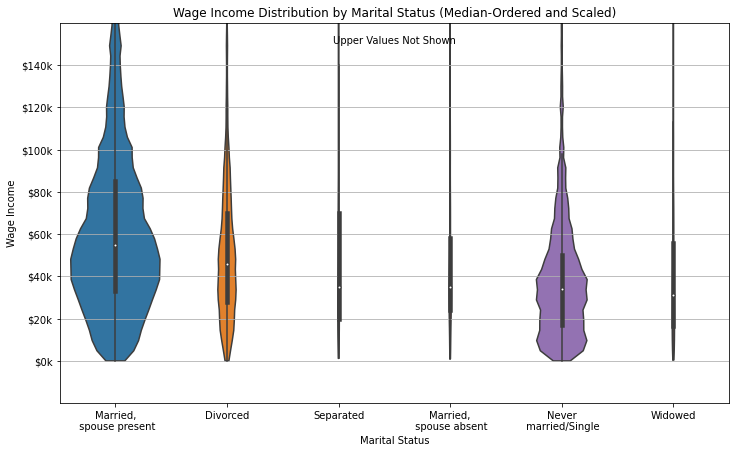

In [92]:
# Create violinplots of wage income by marital status

plt.figure(figsize=(12,7))

sb.violinplot(data=df19wages_expanded, 
              x='marst', 
              y='incwage', 
              order=marst_medianorder.keys(),
              scale='count',
              inner='box',
              cut=0)

# Title, Labels, and Ticks
plt.title('Wage Income Distribution by Marital Status (Median-Ordered and Scaled)')

plt.xlabel('Marital Status')
plt.ylabel('Wage Income')

xlocs, xlabels = plt.xticks()  # Get locations and labels
# print(xlocs, xlabels)
plt.xticks(ticks=xlocs, labels=list_marst_medianorder)

ylocs = np.arange(0, 150000, 20000)
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

# Add grid lines
plt.grid(visible=True, axis='y')  # put in horizontal grid lines

# Text
plt.text(x=(len(xlocs)/2 - 0.5), y=1.5e5, s='Upper Values Not Shown', ha='center')

# Change y limits
plt.ylim(-2e4,1.6e5);

#### Observations

These scaled violinplots with inner boxplots give a visual representation to the relative size of each marital category.  Ordering by the median value helps one to see relative differences in wage income among the categories. 

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Wage Income by Race/Ethnicity<a name="bi_race"></a>

**Question**: Does the distribution of wage income vary by race/ethnicity?

In [93]:
rachsing_dict.keys(), rachsing_dict.values()

(dict_keys([1, 2, 3, 4, 5]),
 dict_values(['White', 'Black/African\n American', 'American Indian/\nAlaska Native', 'Asian/Pacific\n Islander', 'Hispanic/Latino']))

In [94]:
# order race by medians of incwage
race_medianorder = (df19wages_expanded[['rachsing', 'incwage']]
                    .groupby(by='rachsing')
                    .incwage.median()
                    .sort_values(ascending=False))

race_medianorder

rachsing
1    48000.0
4    40000.0
2    35000.0
5    33000.0
3    29200.0
Name: incwage, dtype: float64

In [95]:
# create list of labels from the order of medians
list_race_medianorder = [rachsing_dict[x] for x in race_medianorder.keys()]

list_race_medianorder

['White',
 'Asian/Pacific\n Islander',
 'Black/African\n American',
 'Hispanic/Latino',
 'American Indian/\nAlaska Native']

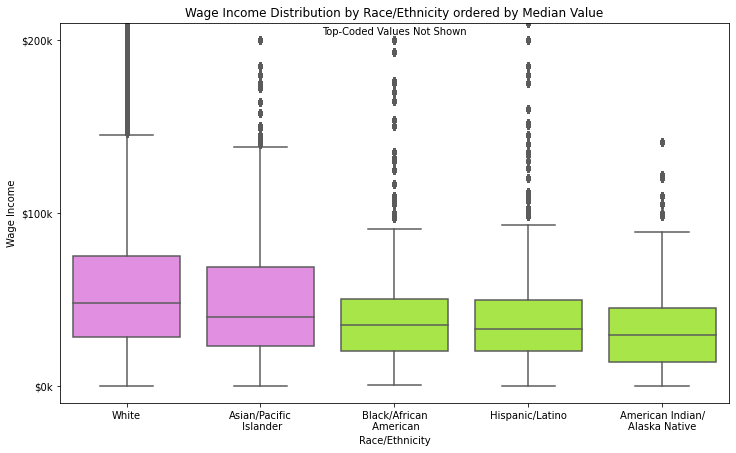

In [96]:
# Create boxplots of wage income by race/ethnicity

plt.figure(figsize=(12,7))

sb.boxplot(data=df19wages_expanded, x='rachsing', y='incwage', 
           order=race_medianorder.keys(),
           palette=['violet']*2 + ['greenyellow']*3)


# Title, Labels, and Ticks
plt.title('Wage Income Distribution by Race/Ethnicity ordered by Median Value')

plt.xlabel('Race/Ethnicity')
plt.ylabel('Wage Income')

xlocs, xlabels = plt.xticks()  # Get locations and labels
#print(xlocs, xlabels)
plt.xticks(ticks=xlocs, labels=list_race_medianorder)

ylocs, ylabels = plt.yticks()  # Get locations and labels
ylocs = ylocs[1:-1]    # Remove first and last
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

# Change y limits
ylim_top = 2.1e5
plt.ylim(-1e4,ylim_top)

# Add text
plt.text(x=(len(xlocs)/2 - 0.5), y=ylim_top * (1 - 0.033), 
         s='Top-Coded Values Not Shown', ha='center');

#### Observations

- Clearly, Whites and Asian/Pacific Islanders obtain proportionately higher incomes than Blacks, American Indians, and Hispanics.  This was not altogether surprising.
- It is somewhat surprising that the boxplots in this graphic cluster into two groups.  The White and Asian/Pacific Islander boxplots are very similar in structural appearance (and, hence, have been assigned the same color).  Likewise, the Black, American Indian, and Hispanic boxplots are remarkably similar in structure.
- These observations say nothing about causation and that would be something to research further.  Simply being a minority is, however, not sufficient to explain the observed disparity in wages by some minority groups as compared with Whites since the Asian/Pacific Islander category acts as a counterexample.
- Question: Are the differences in wage income due to differences in educational attainment?

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Wage Income by Educational Attainment<a name="bi_educat"></a>

**Question**: Does the distribution of wage income vary by educational attainment?

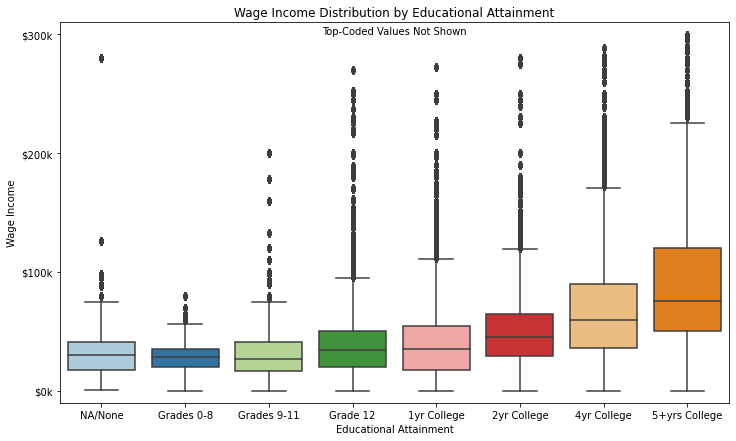

In [97]:
# Create boxplots of wage income by educational attainment categories

plt.figure(figsize=(12,7))

sb.boxplot(data=df19wages_expanded, x='educat', y='incwage',
           palette="Paired")

plt.title('Wage Income Distribution by Educational Attainment')

plt.xlabel('Educational Attainment')
plt.ylabel('Wage Income')


xlocs, xlabels = plt.xticks()  # Get locations and labels

ylocs, ylabels = plt.yticks()  # Get locations and labels
ylocs = ylocs[1:-1]    # Remove first and last
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

plt.text(x=(len(xlocs)/2 - 0.5), y=3e5, s='Top-Coded Values Not Shown', ha='center')

plt.ylim(-1e4,3.1e5);

#### Observations

- We see here a positive relationship between educational attainment and wage income.  Greater educational attainment correlates with greater wage income on average.  This was expected, but the visual representation is still powerful.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Distribution of Levels of Educational Attainment by Race/Ethnicity<a name="bi_edurace"></a>

**Question**:  Could proportionate differences in educational attainment explain observed differences in average wages based on race/ethnicity?

In [98]:
racelist = [1, 4, 2, 3, 5]

In [99]:
educatlist = df19wages.educat.cat.categories.to_list()
educatlist

['NA/None',
 'Grades 0-8',
 'Grades 9-11',
 'Grade 12',
 '1yr College',
 '2yr College',
 '4yr College',
 '5+yrs College']

In [100]:
# Create table of proportions of educational attainment for each race/ethnicity
df_props = (df19wages_expanded[['rachsing', 'educat']]
 .groupby(by='rachsing')
 .educat
 .value_counts(normalize=True)).reset_index()

df_props.columns = ['rachsing', 'educat', 'prop']

df_props['perc'] = df_props['prop'] * 100
df_props

,rachsing,educat,prop,perc
0,1,4yr College,0.299963,29.996286
1,1,Grade 12,0.265785,26.578530
2,1,1yr College,0.153116,15.311596
3,1,5+yrs College,0.134964,13.496393
4,1,2yr College,0.132589,13.258927
5,1,Grades 9-11,0.009477,0.947707
6,1,NA/None,0.002331,0.233110
7,1,Grades 0-8,0.001775,0.177450
8,2,Grade 12,0.372208,37.220803
9,2,1yr College,0.178599,17.859865


In [101]:
# Check that loop creates inner counts as expected for stacked bars
for level in educatlist:
    inner_counts = [df_props.loc[(df_props.rachsing == race) 
                                 & (df_props.educat == level)].perc.squeeze() 
                    for race in racelist]
    print(inner_counts)

[0.2331098740379488, 3.459642012833502, 3.2627983965277494, 1.3074842200180343, 3.118045013044055]
[0.17745038165251933, 1.4515366430260048, 1.6878349051938306, 1.3863841298467088, 8.449157663566554]
[0.947707356908905, 2.3519081391421817, 2.7019321956980864, 16.77750225428314, 9.496366825357052]
[26.578529603810015, 25.328605200945624, 37.22080324883492, 33.25067628494139, 33.51216708181644]
[15.311596358241214, 14.237757514353259, 17.859864903390214, 17.899008115419296, 14.019042846404409]
[13.258927078585042, 9.222559945964202, 13.320572269704497, 8.667718665464383, 8.643713060267956]
[29.996286433867724, 23.22323539344816, 14.438231991482281, 12.95649233543733, 16.224740961280528]
[13.496392912896635, 20.724755150287066, 9.507962089168418, 7.75473399458972, 6.536766548263004]


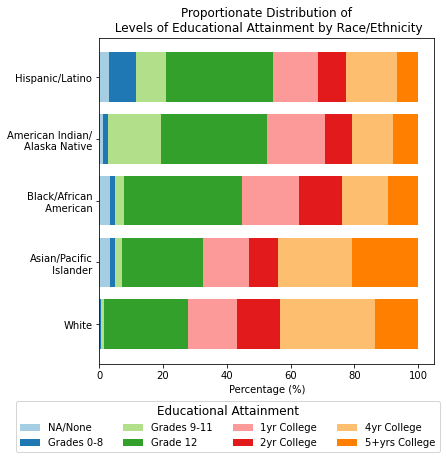

In [102]:
plt.figure(figsize=(6, 6))

# Initialize bars to zero
baselines = np.zeros(5)

# Create stacked bars
for i, level in enumerate(educatlist):
    inner_counts = [df_props.loc[(df_props.rachsing == race) 
                                 & (df_props.educat == level)].perc.squeeze() 
                    for race in racelist]
    plt.barh(y=np.arange(len(racelist)), 
            width=inner_counts,
            left=baselines,
            tick_label=racelist,
            zorder=2,
            color=sb.color_palette('Paired')[i])
    baselines += inner_counts
    
# Legend
plt.legend(labels=educatlist,
           loc=(-0.25, -0.27),
           title='Educational Attainment',
           title_fontsize='large',
           ncol=4
          )

# Titles, Labels, and Ticks
plt.title('Proportionate Distribution of\n Levels of Educational Attainment by Race/Ethnicity')
plt.xlabel('Percentage (%)')

locs, labels = plt.yticks()
y_labels = [rachsing_dict[num] for num in racelist]
plt.yticks(ticks=locs, labels=y_labels);

#### Observations

- Notice that total collegiate achievement (indicated by the four red and orange bars) increases for the racial/ethnic divisions from top to bottom in the graphic, where Hispanic/Latino is at roughly 45% and White is at roughly 75%.
- We remarked previously that there appeared to be two types of boxplots when looking at boxplots of wage income by race/ethnicity -- one kind for White and Asian/Pacific Islander and another kind for the other racial/ethnic categories.  The sorting into two camps appears here as well -- not for collegiate achievement across all categories since the differences are gradual -- but for the combination of 4yr College and 5+yrs College (the two orange bars).  That is, the White and Asian/Pacific Islander categories achieve the same proportion of achievement when it comes to 4yr college and beyond.  And, the other racial/ethnic categories achieve about the same, albeit lower, proportion of achievement when it comes to 4yr college and beyond.

In [103]:
# What is the percentage attainment of a 4 year college degree and beyond
# for each of the racial/ethnic groups?
df_props[(df_props.educat == '4yr College') | 
         (df_props.educat == '5+yrs College')][['rachsing', 'perc']].groupby(by='rachsing').perc.sum()

rachsing
1    43.492679
2    23.946194
3    20.711226
4    43.947991
5    22.761508
Name: perc, dtype: float64

In [104]:
# Recall the `rachsing` dictionary values
rachsing_dict

{1: 'White',
 2: 'Black/African\n American',
 3: 'American Indian/\nAlaska Native',
 4: 'Asian/Pacific\n Islander',
 5: 'Hispanic/Latino'}

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Distribution of Levels of Educational Attainment by Age Category Under 50<a name="bi_eduage"></a>

We showed a positive relationship between wage income and educational attainment above.  Our background knowledge concerning the causes of salary increases and the demands for highly educated workers leads us to conclude that this positive relationship is indicative that educational attainment is a causal factor for higher wage income.  Taking this as a given, we can investigate the following question.  

**Question**:  Do the observed increase in wages from the 20s to the 30s and then the 40s track with (and, therefore, may be due to) increasing degrees of educational attainment as people pass through these age categories?

In [105]:
agecatlist = df19wages.agecat.cat.categories[:3].to_list()
agecatlist

['20s', '30s', '40s']

In [106]:
mask = df19wages_expanded['age'] < 50

df_props = (df19wages_expanded
 .loc[mask, ['agecat', 'educat']]
 .groupby(by='agecat', observed=True)
 .educat
 .value_counts(normalize=True).reset_index())

df_props.columns = ['agecat', 'educat', 'prop']

df_props['perc'] = df_props['prop'] * 100
df_props

,agecat,educat,prop,perc
0,20s,4yr College,0.291854,29.185361
1,20s,Grade 12,0.285905,28.590522
2,20s,1yr College,0.229653,22.965322
3,20s,2yr College,0.108910,10.890992
4,20s,5+yrs College,0.060415,6.041504
5,20s,Grades 9-11,0.014428,1.442799
6,20s,NA/None,0.005700,0.569978
7,20s,Grades 0-8,0.003135,0.313521
8,30s,4yr College,0.314377,31.437678
9,30s,Grade 12,0.222822,22.282234


In [107]:
df_props.loc[(df_props.agecat == '20s') & (df_props.educat == 'Grades 0-8'), 'perc'].squeeze()

0.3135214684618093

In [108]:
for level in educatlist:
    inner_counts = [df_props.loc[(df_props.agecat == agecat) 
                                 & (df_props.educat == level)].perc.squeeze() 
                    for agecat in agecatlist]
    print(inner_counts)

[0.569978358842757, 0.8493684567623646, 0.8277713887619838]
[0.3135214684618093, 1.1165021735185754, 1.175053781509663]
[1.442799434693595, 1.7717923836122225, 2.1187026622066085]
[28.590521606951867, 22.28223395107019, 23.918899758967815]
[22.96532242320893, 11.494481392945334, 12.954823531882939]
[10.890991638871322, 13.874070041734713, 13.95991198911942]
[29.185361434022838, 31.43767800367644, 28.20741720973301]
[6.041503634946881, 17.17387359668016, 16.837419677818563]


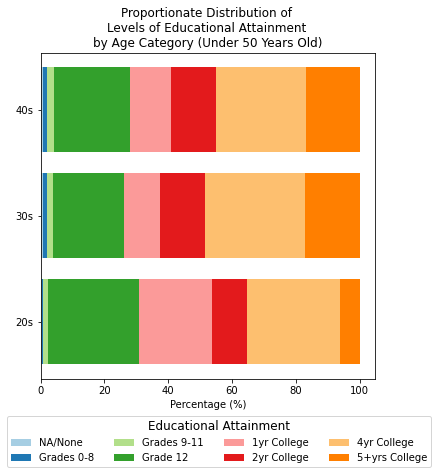

In [109]:
plt.figure(figsize=(6, 6))

baselines = np.zeros(3)

for i, level in enumerate(educatlist):
    inner_counts = [df_props.loc[(df_props.agecat == agecat) 
                                 & (df_props.educat == level)].perc.squeeze() 
                    for agecat in agecatlist]
    plt.barh(y=np.arange(len(agecatlist)), 
            width=inner_counts,
            left=baselines,
            tick_label=agecatlist,
            zorder=2,
            color=sb.color_palette('Paired')[i]
           )
    baselines += inner_counts
    
# Legend
plt.legend(labels=educatlist,
           loc=(-0.10,-0.27),
           title='Educational Attainment',
           title_fontsize='large',
           ncol=4
          )

title = '''Proportionate Distribution of 
Levels of Educational Attainment 
by Age Category (Under 50 Years Old)'''
plt.title(title)
plt.xlabel('Percentage (%)');

#### Observations
- The split between no college (blue and green) and some college (red and orange) saw a slight decrease in no college from the 20s to the 30s but remained fairly similar across the age categories.
- From the 20s to the 30s there is a decrease in the proportion of those with just 1 year of college and increases in 2yr college and in 5+yrs college, the latter being the most striking.  This seems to correspond with our background knowledge that many people pursue graduate studies not only in their 20s but also their 30s.
- The fact that the distribution of levels of educational attainment is fairly similar between the 30s and 40s seems to undermine the proposition that the increase in wages over these three age categories is solely due to growth in educational attainment since the growth in wages from the 30s to the 40s cannot be explained by little change in the distribution.  Of course, common sense suggests that other factors influencing increasing wages with increasing age are experience and time-based promotions.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- **Wage Income by Age**:  We saw that wage incomes increase from the 20s into the 30s and 40s.  We investigated whether this increase was solely due to changes in educational attainment and came to the conclusion that this was not the case since we found that, although there are increases in educational attainment from the 20s to the 30s, educational attainment was largely stable from the 30s to the 40s. We also saw that average wage incomes decrease starting in the 60s. This could easily be explained by a disproportionate exodus from the labor force of higher wage earners due to retirement.

- **Wage Income by Sex**: Although the sex ratio for people in Minnesota 20 years old or more was 0.98, the sex ratio for wage earners in that same age range was 1.07.  We observed that "on average" women had lower wages than men.  In other words, proportionately, more men had high wages than women.

- **Wage Income by Marital Status**: On average, people who were married with the spouse present had the highest wage incomes.  This relationship does not necessarily indicate a causal relationship, however.

- **Wage Income by Educational Attainment**: There was an obvious proportionate increase in wage incomes with increasing levels of educational attainment.

- **Wage Income by Race/Ethnicity**: We observed that boxplots of wage income by Race/Ethnicity seemed to divide the racial/ethnic categories into two groups -- on one hand, Whites and Asians, and on the other hand, Blacks, Hispanics, and American Indians.  We further investigated whether this might be due to differences in educational attainment.  We found a similar bifurcation into two groups reflected in the proportion of the population obtaining 4 or more years of college, suggesting that educational attainment may indeed explain the disparities.




### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Wage income is the main feature of interest in this study.  As mentioned above, in the process of investigating how wage incomes vary with other factors, new questions were raised about relationships between some of the other variables -- for example: 

(a) How did the proportionate distribution among the levels of educational attainment change with age category for people under the age of 50?

(b) What is the proportionate distribution of the levels of educational attainment among the various categories of race/ethnicity?  

For the first question, it was observed that there were proportionate increases for the categories of 2yr college and 5+yrs college from the 20s to the 30s.  The proportions remained fairly similar from the 30s to the 40s.  For the second question, we observed that Whites and Asians obtained roughly the same proportions for those achieving 4 years of college or more.  And, Blacks, Hispanics, and American Indians obtained similar, albeit lower, proportions for the same (combined) measure of educational attainment.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

## Multivariate Exploration<a name="multivariate"></a>

- [Wage Income by Educational Attainment and Age Category under 50](#multi_educat-agecat)
- [The Impact of Education on Wage Income across Racial/Ethnic Categories](#multi_educat-rachsing)
- [Sex Differences in Wage Income](#multi_sex)

### Wage Income by Educational Attainment and Age Category under 50<a name="multi_educat-agecat"></a>

Let us continue the investigation of whether the increase in wages from the 20s to the 30s and then the 40s is due to changes in educational attainment.

**Question**:  Are there noticeable increases in average wage income with age across each level of educational attainment?

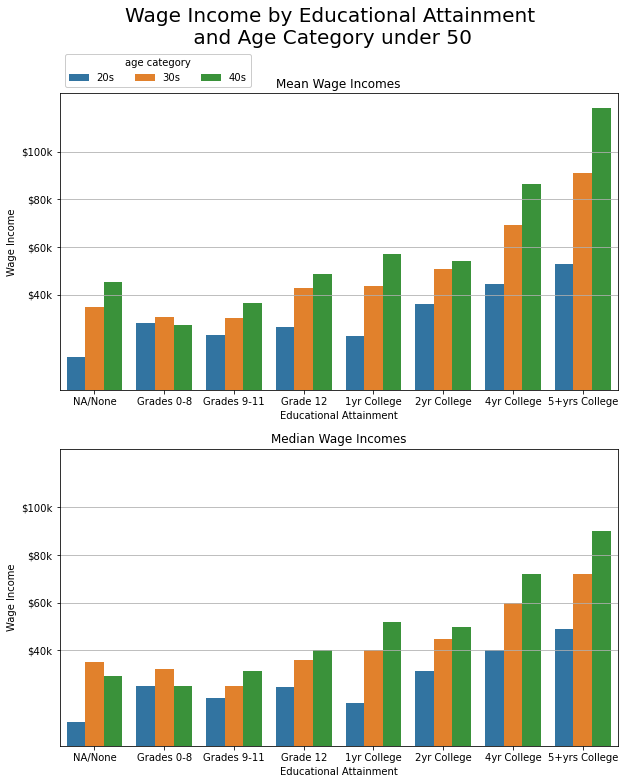

In [110]:
mask = df19wages_expanded['age'] < 50

fig = plt.figure(figsize=(10,12))

fig.suptitle('Wage Income by Educational Attainment\n and Age Category under 50', fontsize=20)


########### Plot 1
ax1 = plt.subplot(211)

# Barplot
ax = sb.barplot(data=df19wages_expanded[mask], 
                x='educat', y='incwage', hue='agecat',
                hue_order=df19wages_expanded.agecat.cat.categories.tolist()[:3],
                ci=None)

# Legend
ax.legend(loc='upper left', 
          bbox_to_anchor = (0., 1.15),
          ncol = 3, 
          framealpha = 1, 
          title = 'age category')

# Title, Labels, and Ticks
plt.title('Mean Wage Incomes')

plt.xlabel('Educational Attainment')
plt.ylabel('Wage Income')

ylocs, ylabels = plt.yticks()  # Get locations and labels
ylocs = ylocs[1:-1]    # Remove first and last
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

# Add grid lines
plt.grid(visible=True, axis='y')  # put in horizontal grid lines


########### Plot 2
plt.subplot(212, sharey=ax1)

# Barplot
ax = sb.barplot(data=df19wages_expanded[mask], 
                x='educat', y='incwage', hue='agecat',
                hue_order=df19wages_expanded.agecat.cat.categories.tolist()[:3],
                estimator=np.median, ci=None)

# Legend
ax.legend().remove()

# Title, Labels, and Ticks
plt.title('Median Wage Incomes')

plt.xlabel('Educational Attainment')
plt.ylabel('Wage Income')

ylocs, ylabels = plt.yticks()  # Get locations and labels
ylocs = ylocs[1:-1]    # Remove first and last
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

# Add grid lines
plt.grid(visible=True, axis='y')  # put in horizontal grid lines

# Add grid lines
plt.grid(visible=True, axis='y');  # put in horizontal grid lines

#### Observations

- We see that bar heights are routinely greater when the statistic of concern is the mean as opposed to the median since the mean is affected by extreme outliers on the high end.
- Are increases in wage income from the 20s to the 30s and then the 40s due to changes in educational attainment?  Although this could play some role, it cannot be the sole factor as we saw previously.  In these graphics, we see that even within the levels of educational attainment, there is consistent growth in the mean and median wage incomes across the age categories indicating that growth in wage income is also simply a factor of age regardless of educational attainment.  Common sense tells us that this is likely due to the development of experience and expertise as well as time-based promotion practices.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### The Impact of Education on Wage Income across Racial/Ethnic Categories<a name="multi_educat-rachsing"></a>

**Question**:  Is there a steady increase in average wage incomes with increasing educational attainment across each of the major racial/ethnic categories?

<Figure size 864x504 with 0 Axes>

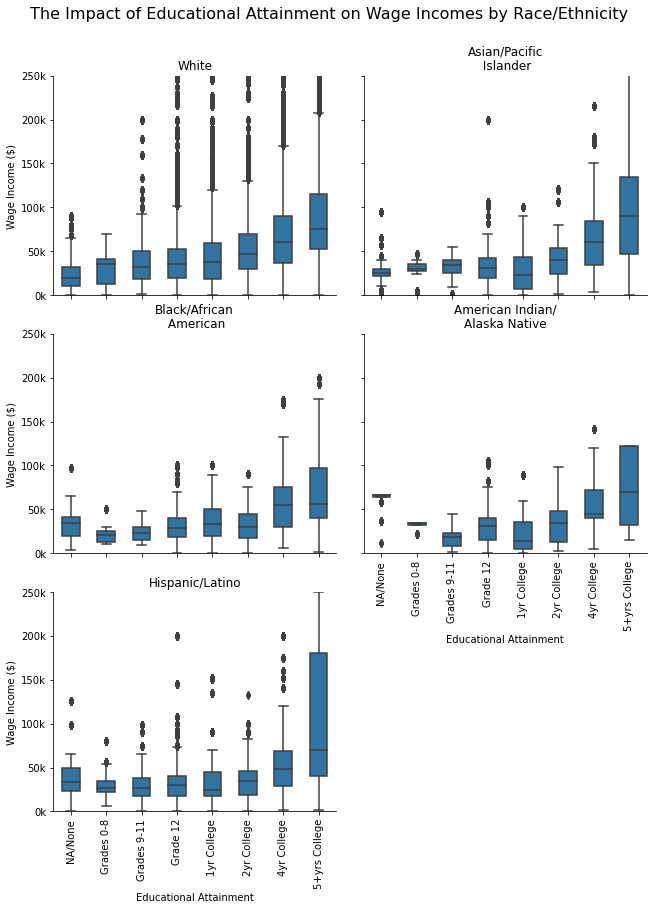

In [111]:
plt.figure(figsize=(12,7))

g = sb.FacetGrid(data=df19wages_expanded, 
                 col='rachsing', 
                 height=4, aspect=1.2, 
                 col_wrap=2,
                 col_order=racelist)
g.map(sb.boxplot, 'educat', 'incwage', width=0.5, order=edulist2)
g.set(ylim=(0, 2.5e5))


# Title,Labels, and Ticks
g.set_xlabels(label='Educational Attainment')
g.set_xticklabels(rotation=90)

ylocs, ylabels = plt.yticks()
ylabels = [f"{num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

g.set_ylabels('Wage Income ($)')

# Add suptitle
# https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('The Impact of Educational Attainment on Wage Incomes by Race/Ethnicity', 
                fontsize=16)

# To change facet titles:
# https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles
axes = g.axes.flatten()
for i, j in enumerate(racelist):
    axes[i].set_title(rachsing_dict[j])


#### Observations
- We see that the positive relationship between educational attainment and wage income holds across the major racial/ethnic categories.
- Why are there dips in wage income from those with a grade 12 education to those with just one year of college in the case of Asians, American Indians, and Hispanics?  This is a question for investigation.

In [112]:
# Create new variable `Race` with interpreted values rather than numbers
df19wages_expanded = df19wages_expanded.assign(Race=df19wages_expanded
                                               .rachsing
                                               .map(rachsing_dict))

In [113]:
# Check creation of new variable
df19wages_expanded.columns

Index(['perwt', 'sex', 'age', 'marst', 'rachsing', 'empstat', 'incwage',
       'incbus00', 'incearn', 'erscor90', 'agecat', 'educat', 'empstat',
       'labforce', 'empclass', 'Race'],
      dtype='object')

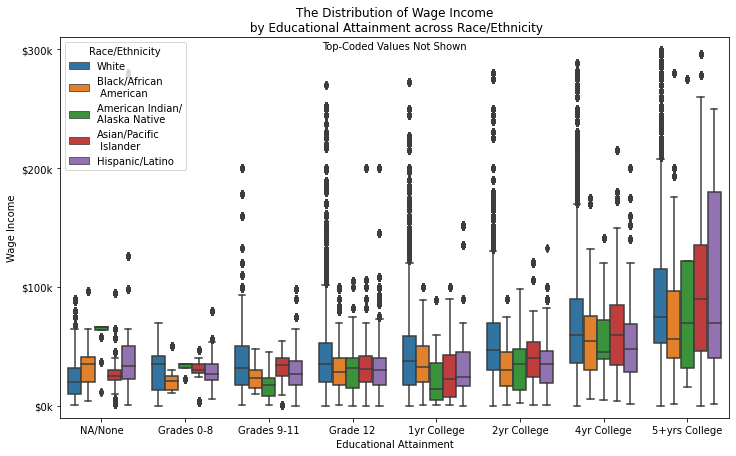

In [114]:
plt.figure(figsize=(12,7))

sb.boxplot(data=df19wages_expanded,
           x='educat',
           y='incwage',
           hue='Race',
           hue_order=rachsing_dict.values()
          )


# Title, Labels, and Ticks
xlocs, xlabels = plt.xticks()
ylocs, ylabels = plt.yticks()
ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
plt.yticks(ticks=ylocs, labels=ylabels)

plt.ylabel('Wage Income')
plt.xlabel('Educational Attainment')

plt.title('The Distribution of Wage Income\n by Educational Attainment across Race/Ethnicity')


# Legend
plt.legend(loc='upper left', title='Race/Ethnicity')


# Change y limits
ylim_top = 3.1e5
plt.ylim(-1e4,ylim_top)

# Add text
plt.text(x=(len(xlocs)/2 - 0.5), y=ylim_top * (1 - 0.033), 
         s='Top-Coded Values Not Shown', ha='center');


#### Observations
- Again, we see the positive impact of educational attainment on wage incomes across the major ethnic/racial categories.  This graphic shows that the degree of impact is not the same  (adjacent boxplots within each grouping are in some cases noticeably dissimilar) but the direction of impact is the same from left to right across the graphic.
- We again see a dip in wage income in comparing those with a grade 12 education with those who had 1 year of college in the case of American Indians, Asians, and Hispanics.  This raises the question, "Why?"

In [115]:
# Create table of median wages by rachsing and educat
edurace_dist = (df19wages_expanded[['rachsing', 'educat', 'incwage']]
                     .groupby(by=['rachsing', 'educat'])
                     .incwage
                     .median().rename('median_wage').to_frame())

edurace_dist

median_wage
rachsing educat                    
1        NA/None            20000.0
         Grades 0-8         35000.0
         Grades 9-11        32000.0
         Grade 12           35000.0
         1yr College        38000.0
         2yr College        47000.0
         4yr College        60000.0
         5+yrs College      75000.0
2        NA/None            35000.0
         Grades 0-8         21100.0
         Grades 9-11        23400.0
         Grade 12           28800.0
         1yr College        33000.0
         2yr College        30000.0
         4yr College        55000.0
         5+yrs College      56000.0
3        NA/None            66000.0
         Grades 0-8         35000.0
         Grades 9-11        18000.0
         Grade 12           31500.0
         1yr College        13900.0
         2yr College        35000.0
         4yr College        45000.0
         5+yrs College      70000.0
4        NA/None            25000.0
         Grades 0-8         30000.0
         Grades 9-11        34000.0
         Grade 12           30700.0
         1yr College        23000.0
         2yr College        40000.0
         4yr College        60000.0
         5+yrs College      90000.0
5        NA/None            33300.0
         Grades 0-8         27100.0
         Grades 9-11        27200.0
         Grade 12           30000.0
         1yr College        24000.0
         2yr College        35000.0
         4yr College        48000.0
         5+yrs College      70000.0

In [116]:
# Create pivot table
edurace_dist.reset_index(inplace=True)
edurace_table = edurace_dist.pivot(index = 'rachsing', 
                                  columns = 'educat', 
                                  values = 'median_wage')
edurace_table

educat,NA/None,Grades 0-8,Grades 9-11,Grade 12,1yr College,2yr College,4yr College,5+yrs College
rachsing,,,,,,,,
1,20000.0,35000.0,32000.0,35000.0,38000.0,47000.0,60000.0,75000.0
2,35000.0,21100.0,23400.0,28800.0,33000.0,30000.0,55000.0,56000.0
3,66000.0,35000.0,18000.0,31500.0,13900.0,35000.0,45000.0,70000.0
4,25000.0,30000.0,34000.0,30700.0,23000.0,40000.0,60000.0,90000.0
5,33300.0,27100.0,27200.0,30000.0,24000.0,35000.0,48000.0,70000.0


In [117]:
# Scale to the thousands
edurace_table/1000

educat,NA/None,Grades 0-8,Grades 9-11,Grade 12,1yr College,2yr College,4yr College,5+yrs College
rachsing,,,,,,,,
1,20.0,35.0,32.0,35.0,38.0,47.0,60.0,75.0
2,35.0,21.1,23.4,28.8,33.0,30.0,55.0,56.0
3,66.0,35.0,18.0,31.5,13.9,35.0,45.0,70.0
4,25.0,30.0,34.0,30.7,23.0,40.0,60.0,90.0
5,33.3,27.1,27.2,30.0,24.0,35.0,48.0,70.0


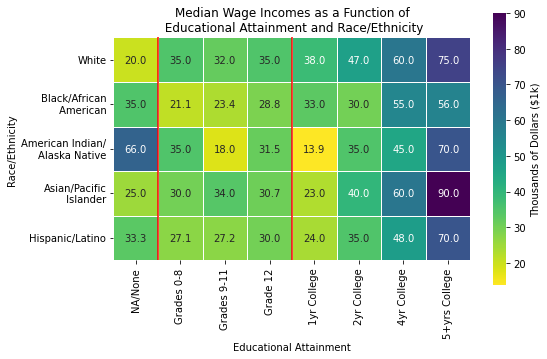

In [118]:
# Create Median Wage Income Table
plt.figure(figsize=(8,5))

sb.heatmap(data=edurace_table/1000, 
           annot = True, 
           cmap='viridis_r', 
           linewidths=.5, 
           fmt = '.1f',
           square=True,
           yticklabels=list(rachsing_dict.values()),
           cbar_kws={'label': 'Thousands of Dollars ($1k)'})

plt.axvline(x=1, color='red')
plt.axvline(x=4, color='red')

plt.title('Median Wage Incomes as a Function of\n Educational Attainment and Race/Ethnicity')
plt.xlabel('Educational Attainment')
plt.ylabel('Race/Ethnicity');

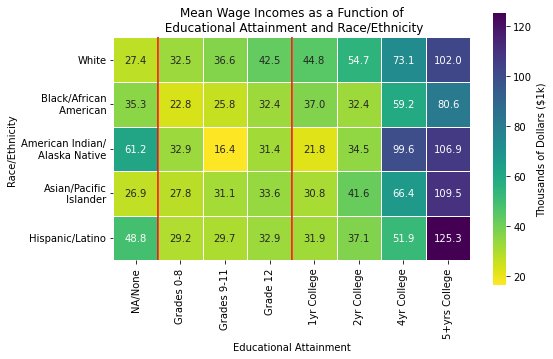

In [119]:
# Create Mean Wage Income Table

edurace_dist = (df19wages_expanded[['rachsing', 'educat', 'incwage']]
                     .groupby(by=['rachsing', 'educat'])
                     .incwage
                     .mean().rename('mean_wage').to_frame())

edurace_dist.reset_index(inplace=True)
edurace_table = edurace_dist.pivot(index = 'rachsing', 
                                  columns = 'educat', 
                                  values = 'mean_wage')

plt.figure(figsize=(8,5))

sb.heatmap(data=edurace_table/1000, 
           annot = True, 
           cmap='viridis_r', 
           linewidths=.5, 
           fmt = '.1f',
           square=True,
           yticklabels=list(rachsing_dict.values()),
           cbar_kws={'label': 'Thousands of Dollars ($1k)'})

plt.axvline(x=1, color='red')
plt.axvline(x=4, color='red')

plt.title('Mean Wage Incomes as a Function of\n Educational Attainment and Race/Ethnicity')
plt.xlabel('Educational Attainment')
plt.ylabel('Race/Ethnicity');

#### Observations on the Heatmap Tables

- Vertical red lines separate the Na/None category from the others since this category appears not to have an unambiguous meaning.  Also, a vertical red line separates high school from college achievements.
- The two previous heatmap tables show the effect of education on wage incomes across the major racial/ethnic categories.  From left to right (corresponding to increasing levels of education), there is, for the most part, an increase in the measure of central tendency (whether mean or median) which indicates that wage incomes increase with increasing levels of education.
- Although the measures of central tendency move in the same direction across all the major racial/ethnic groups, there are some noticeable differences that could lead to questions for future investigation -- for example: Why are the mean and median values for 5+yrs College noticeably lower for the Black/African American category as compared with the other Racial/Ethnic categories?

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

### Sex Differences in Wage Income<a name="multi_sex"></a>

**Question**: Do sex differences in wage income exist regardless of factors such as age category, educational attainment, race/ethnicity, and marital status?  

Let us look at wage income by sex and age category, sex and educational attainment, sex and race/ethnicity, and sex and marital status.

In [120]:
# Create new variable `Sex` with interpreted values (Male/Female) rather than numbers
df19wages_expanded = df19wages_expanded.assign(Sex=df19wages_expanded
                                               .sex
                                               .map(sex_dict))

In [121]:
# Check creation of new variable
df19wages_expanded.columns

Index(['perwt', 'sex', 'age', 'marst', 'rachsing', 'empstat', 'incwage',
       'incbus00', 'incearn', 'erscor90', 'agecat', 'educat', 'empstat',
       'labforce', 'empclass', 'Race', 'Sex'],
      dtype='object')

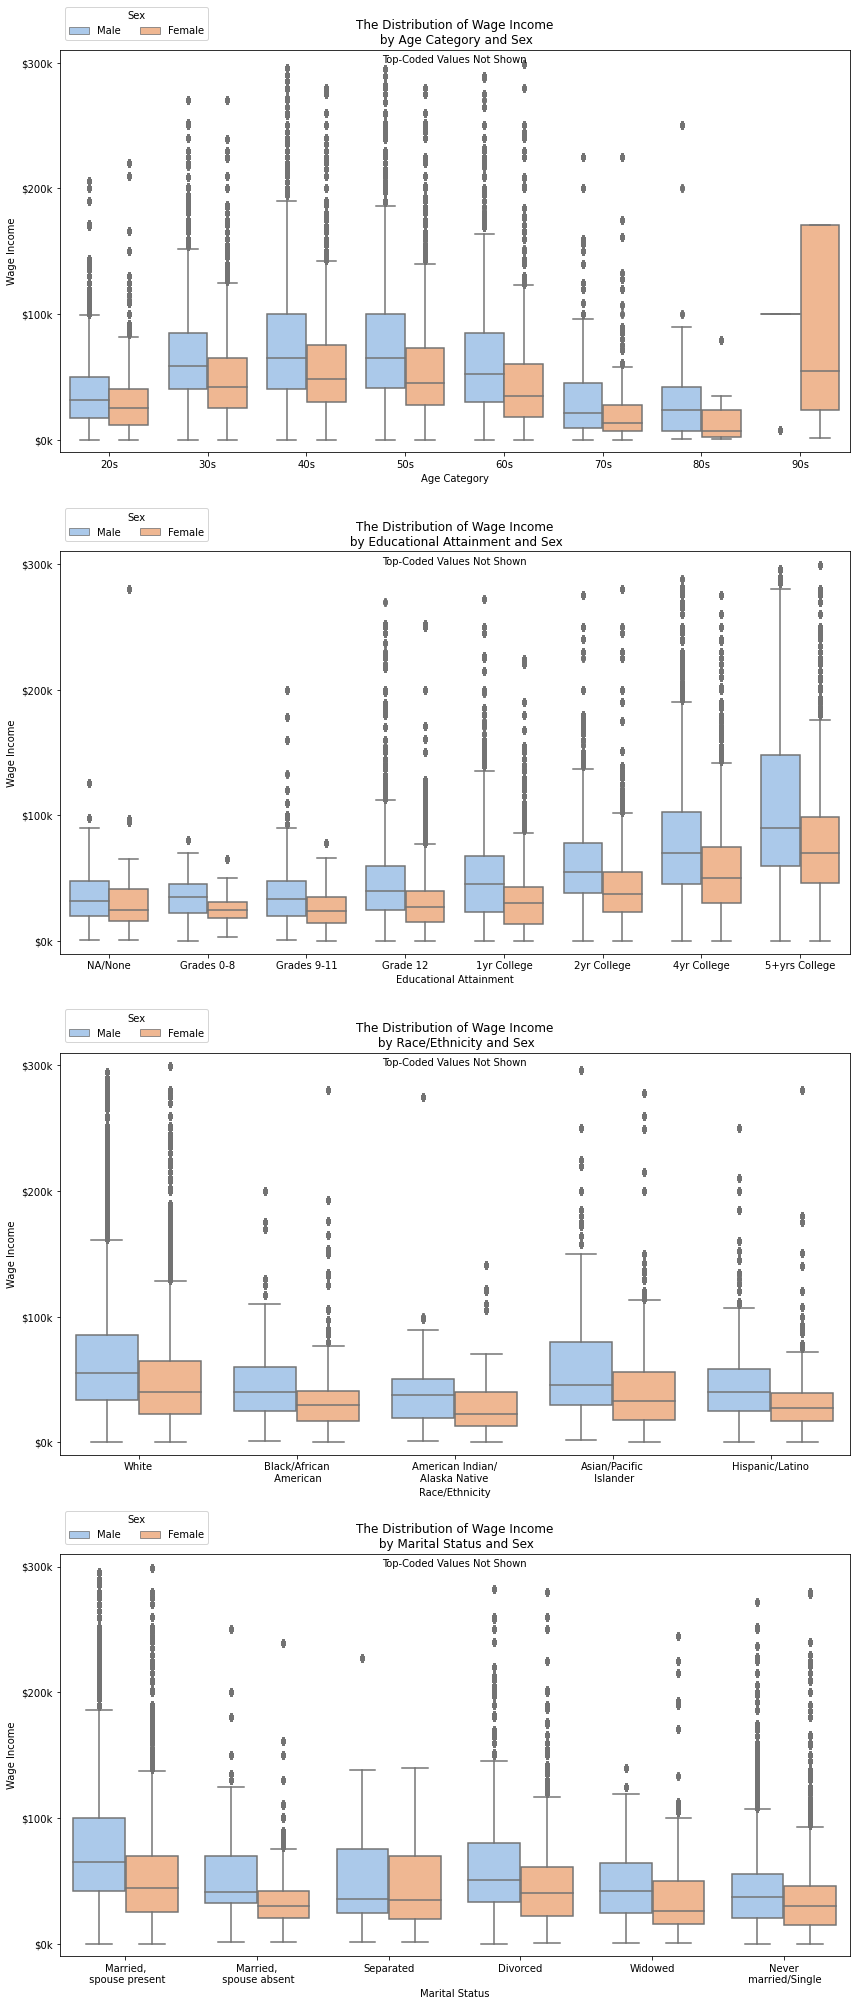

In [122]:
# Create subplots looking at wage income by sex and other factors
x_var_dict = {'agecat': 'Age Category',
              'educat': 'Educational Attainment',
              'rachsing': 'Race/Ethnicity',
              'marst': 'Marital Status'}
x_order_list = [df19wages_expanded.agecat.cat.categories, 
                df19wages_expanded.educat.cat.categories, 
                rachsing_dict.keys(),
                marst_dict.keys()]
x_order_labels = [df19wages_expanded.agecat.cat.categories, 
                df19wages_expanded.educat.cat.categories, 
                rachsing_dict.values(),
                marst_dict.values()]


fig = plt.figure(figsize=(12,28))


for i, (x_var, x_order, x_labels) in enumerate(zip(x_var_dict.keys(), 
                                                  x_order_list, 
                                                  x_order_labels)):
    plt.subplot(4, 1, i+1)
    
    sb.boxplot(data=df19wages_expanded,
               x=x_var,
               y='incwage',
               order=x_order,
               hue='Sex',
               hue_order=['Male', 'Female'],
               palette='pastel'
              )

# Title, Labels, and Ticks

    xlocs, xlabels = plt.xticks()
    plt.xticks(ticks=xlocs, labels=x_labels)
    ylocs, ylabels = plt.yticks()
    ylabels = [f"${num/1e3:.0f}k" for num in ylocs]
    plt.yticks(ticks=ylocs, labels=ylabels)

    plt.ylabel('Wage Income')
    plt.xlabel(f"{x_var_dict[x_var]}")

    plt.title('The Distribution of Wage Income\n by ' + f"{x_var_dict[x_var]}" + ' and Sex')


# Legend
    plt.legend(loc='upper left', 
               bbox_to_anchor=(0, 1.12),
               ncol=2,
               title='Sex')

# Change y limits
    ylim_top = 3.1e5
    plt.ylim(-1e4,ylim_top)

# Add text
    plt.text(x=(len(xlocs)/2 - 0.5), y=ylim_top * (1 - 0.033), 
             s='Top-Coded Values Not Shown', ha='center')
    
# Adjust the layout
    fig.tight_layout()
    
plt.show();

#### Observations

- It may be the case that "on average" differences of wage income between the sexes that show up globally do not show up in certain local circumstances, e.g., when partitioning by the values of a certain factor.  However, we continue to see the same pattern of "on average" sex differences in wage income across the factors of Age Category, Educational Attainment, Race/Ethnicity, and Marital Status.  The one visible exception is that of those with a Separated marital status where the wage income distribution looks to be roughly equal. 

- Just to be clear, these wage differences are "on average" differences.  They do not show wage discrimination on the part of employers, e.g., wage differences between males and females for doing the same job.  Many factors could explain this wage gap.  For example, it may simply be that females "on average" choose careers in lower paid fields.  Or, it may be that proportionately more females choose part time over full time employment than males and that results in lower wages.

- The graphics above illustrate sex-based wage differences but the graphics do not establish that in all cases these differences are statistically significant.  That is, it has not been established that these differences are not due to chance.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- **Wage income by educational attainment and age category under 50**.  Partitioning wage workers by the levels of educational attainment and then looking at wage incomes within each level based on age category under 50 showed that wage growth increased with increasing age category.  Hence, the observed wage growth from the 20s to the 30s and, likewise, from the 30s to the 40s was not simply due to increases in educational attainment.  Rather, age itself (probably due to increasing experience or promotion) was a genuine factor in the observed wage growth across these age categories.

- **The impact of education on wage income across racial/ethnic categories**.  Across the major racial/ethnic categories, "average" wage incomes increase with increasing educational attainment for the most part.

- **Sex differences in wage income**.  There was an observable, continued pattern of "on average" sex differences in wage income across the factors of Age Category, Educational Attainment, Race/Ethnicity, and Marital Status.  Partitioning by these various factors and still obtaining differences in "on average" wage incomes based on sex (if these observable differences cannot be attributed to mere chance) would justify considering these patterns robust.


### Were there any interesting or surprising interactions between features?

It was observed that average wage incomes did not necessarily increase with every increase in educational attainment for all racial/ethnic categories.  In particular, there was a decrease in average wage incomes when comparing people with a 12th grade to those with one year of college in case of Asians, American Indians, and Hispanics.

***
| Go to [TOP](#top). | Go to [Univariate Exploration](#univariate). | Go to [Bivariate Exploration](#bivariate). | Go to [Multivariate Exploration](#multivariate).|
|--|--|--|--|

## Conclusions<a name="conclusions"></a>

This investigation has looked at wage income in Minnesota as reported in the 2019 ACS (American Community Survey) administered through the US Census Bureau.  Since wage income was the focus, only people 20 years old or more were included.  The data was obtained from IPUMS USA, an online source of US Census microdata that also provides documentation and harmonization of variables across time periods.  The 2019 ACS attempts to be a 1% sample of the US population obtained using techniques of clustering and stratification.  The result is a sample with weights in order for the sample to be representative.  Some visualization tools include built-in parameters for including weights in order to make the data graphic representative of the population and some do not.  For the latter case, an expanded data frame (having 2,746,113 rows) was created such that there were as many copies of a row from the original data set as corresponded with the weighting of that row in the original data set.  This expanded data frame could then be fed into the visualization tool to produce a representative data graphic.

- **Wage Income \& Educational Attainment**.  One of the clearest observations from this investigation was the positive correlation between wage income and educational attainment.  Increasing degrees of educational attainment correlated with higher wages on average.  Given our background knowledge that many higher paying jobs often require greater education, this is not surprising yet the visual display of this correlation is still striking.  Also, given our background knowledge that educational achievements can produce direct affects on salary, it is reasonable to interpret these graphics as showing the causal impact of educational attainment on salary.
- **Wage Income \& Age**.  Average wages increase from the 20s to the 30s and into the 40s where they plateau and stay until the 60s and then begin to decline in the 60s and thereafter.  It was investigated whether the increase in average wages in the sub-50s period can be explained solely through increases in educational attainment over that period.  The result was that educational attainment cannot be the sole driving factor.  Also, the decline in average wages starting in the 60s has an easy explanation given the increase in retirement starting in that period if people with higher wages leave the work force disproportionately earlier.
- **Wage Income \& Race/Ethnicity**.  It was observed that Whites and Asians had higher average wages than the other major racial/ethnic categories (Blacks, Hispanics, and American Indians).  It was investigated whether differences in educational attainment could explain the difference in average wages and there was evidence that proportionate differences in educational attainment may be a factor.
- **Wage Income \& Marital Status**.  It was observed that higher average wages were associated with being married with the spouse present.  At the other end, with lower average wages, were those who were widowed or never married/single.  The high-low difference in median wage incomes between the marital status categories was found to be $\$$24,000, a meaningful difference.  What accounts for this difference would be an interesting topic to explore.
- **Wage Income \& Sex**.  Differences in average wage income based on sex (males earning higher wages on average than females) were observed to exist across the various categories of the factors of age, educational attainment, race/ethnicity, and marital status, highlighting the overall fact of difference as fairly robust.  Why that difference exists would be an interesting topic to explore.
